# EDA 2017

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
color = sns.color_palette()

In [3]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'

In [4]:
d = pd.read_csv(open(cur_path+'/Data2017_Uncleaned.csv','rU'), encoding='utf-8')

In [5]:
d.shape

(4276457, 109)

In [6]:
missing_data = d.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/d.shape[0])*100
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent <98)]
len(features)

61

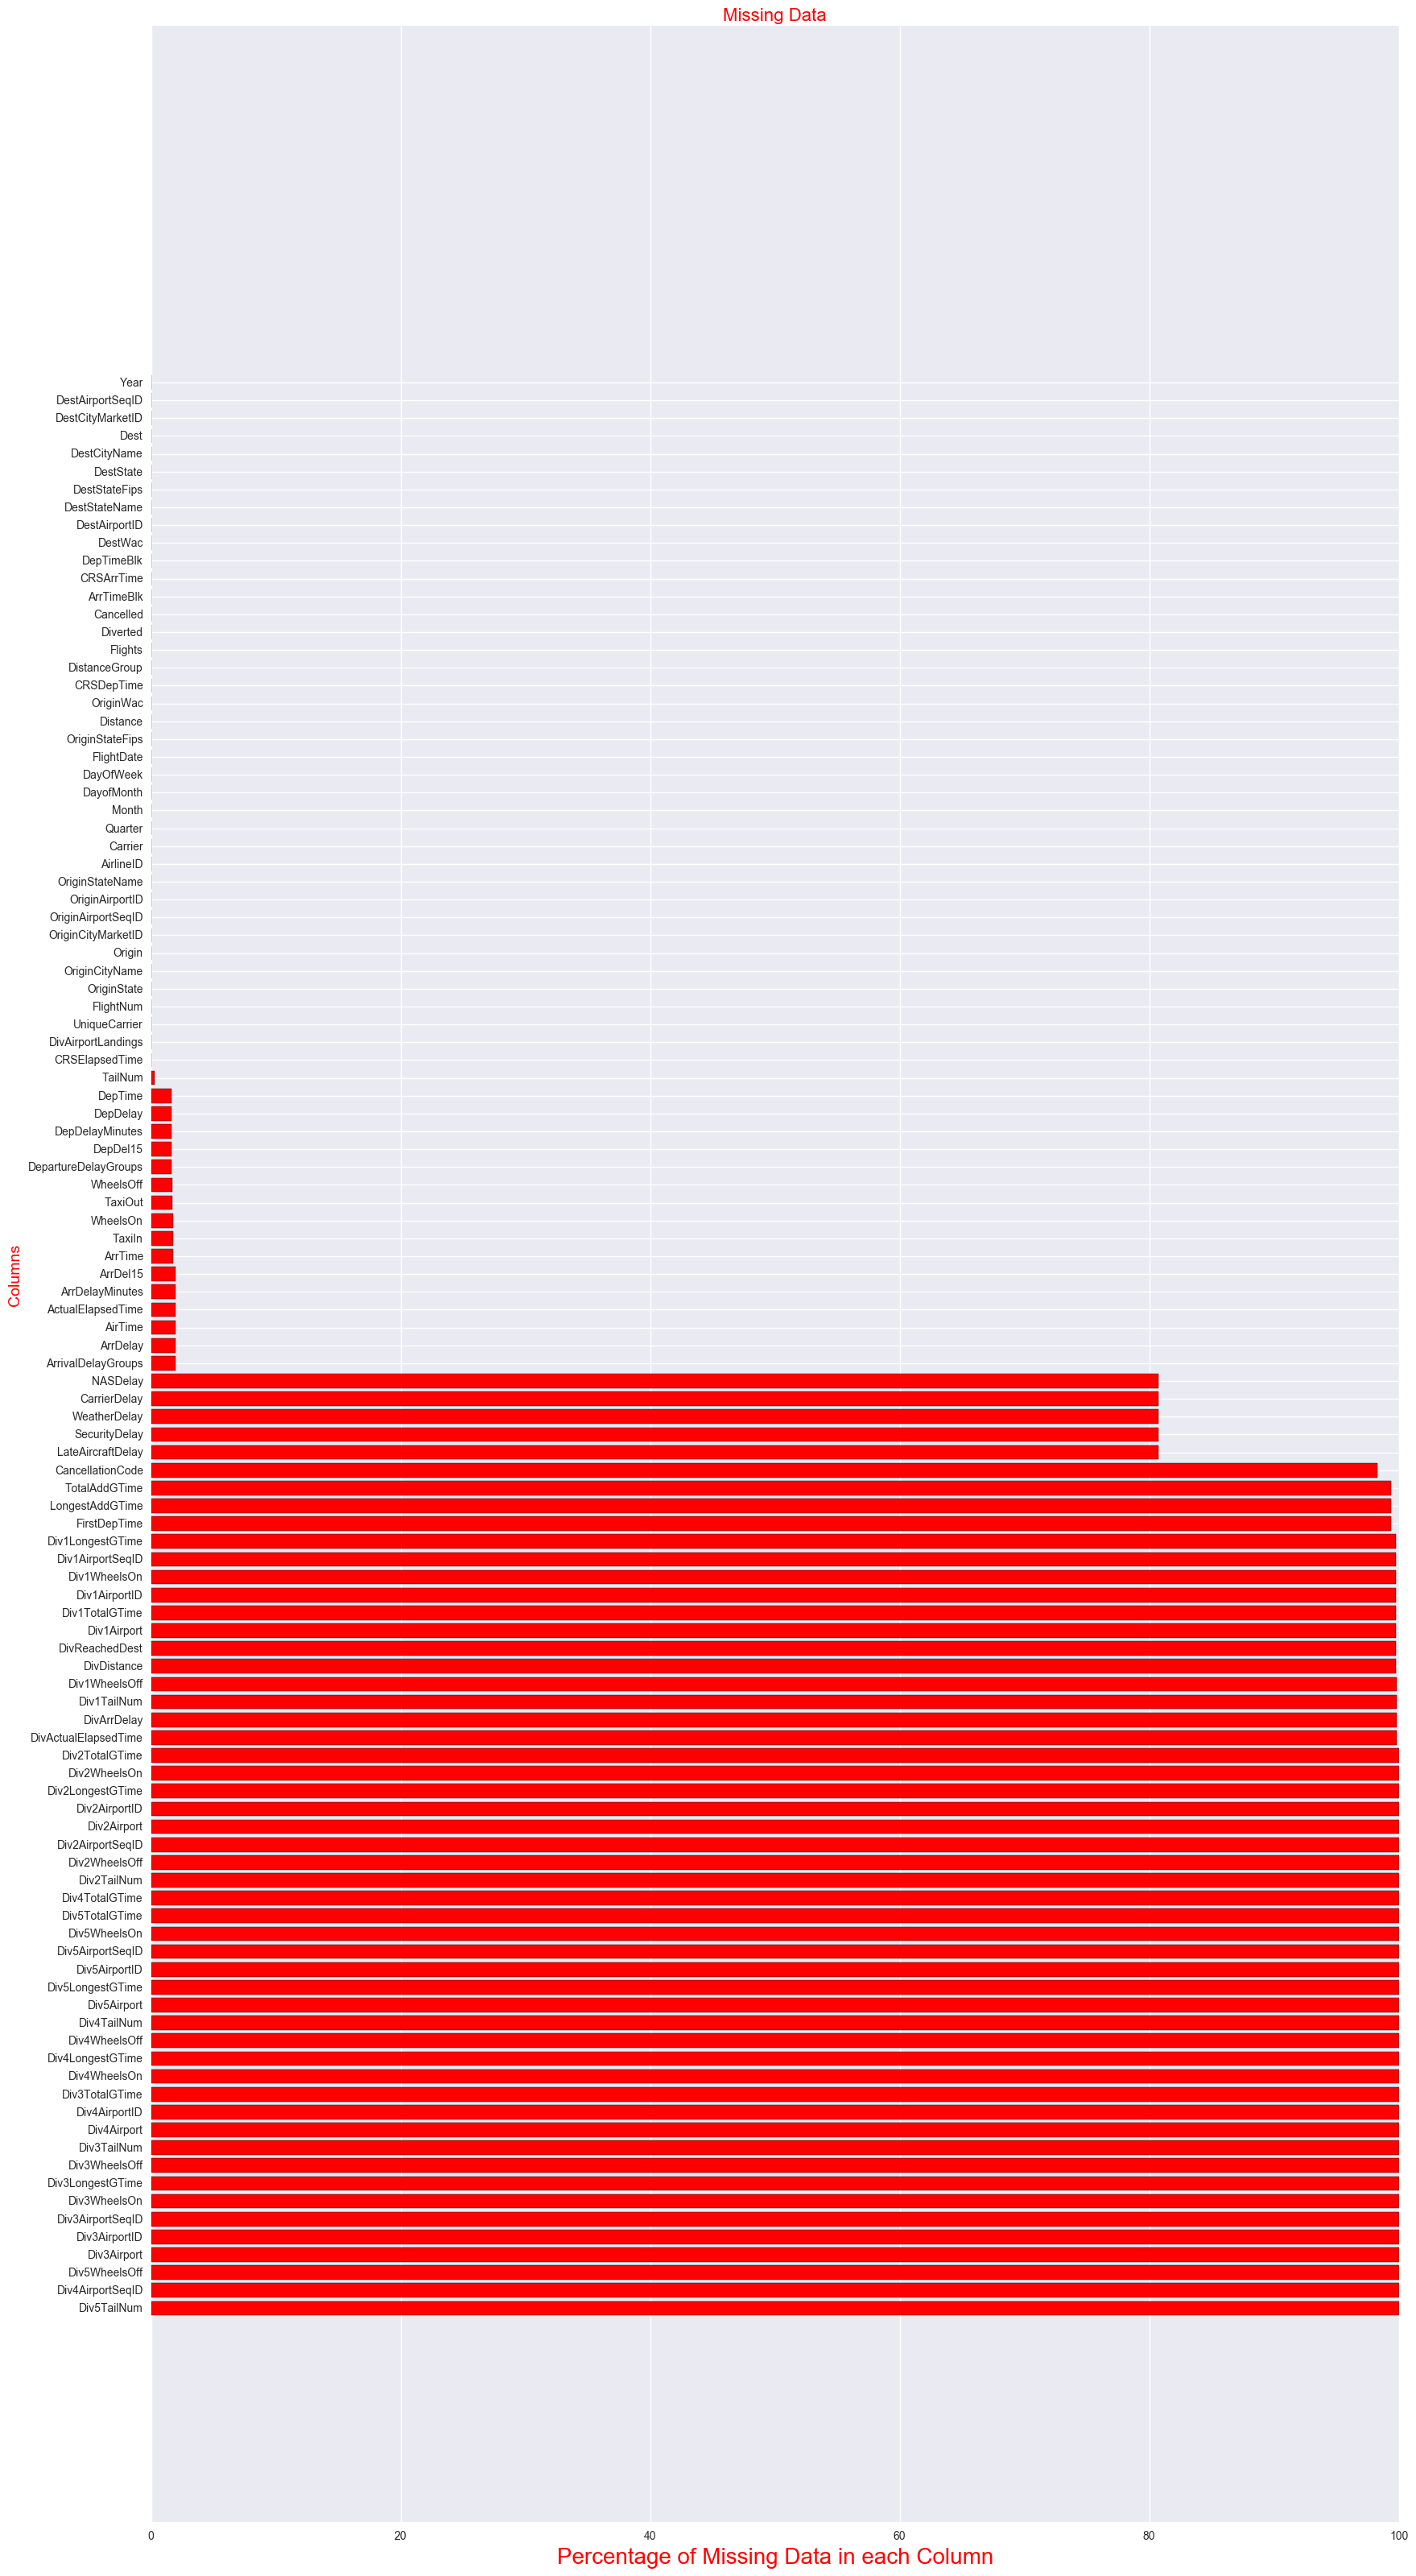

In [7]:
# Missing Data percentage Graph
fig, ax = plt.subplots(figsize=(20,40))
ax.barh(range(d.shape[1]), missing_data.Missing_percent.values, align='center',color='Red')

ax.set_yticks(range(d.shape[1]))
ax.set_yticklabels(missing_data['index'].values,rotation =0,linespacing =20, fontsize =10)
ax.invert_yaxis()  

ax.set_xlabel('Percentage of Missing Data in each Column',fontsize=20, color='red')
ax.set_ylabel('Columns',fontsize=14, color='red')
ax.set_title('Missing Data',fontsize=16, color='red')

plt.show()

In [8]:
# Considering only the columns having 98% or more data
df = d[features]

In [9]:
df.shape

(4276457, 61)

In [10]:
df.columns

Index(['Year', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestAirportID',
       'DestWac', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk', 'Cancelled',
       'Diverted', 'Flights', 'DistanceGroup', 'CRSDepTime', 'OriginWac',
       'Distance', 'OriginStateFips', 'FlightDate', 'DayOfWeek', 'DayofMonth',
       'Month', 'Quarter', 'Carrier', 'AirlineID', 'OriginStateName',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'FlightNum', 'UniqueCarrier',
       'DivAirportLandings', 'CRSElapsedTime', 'TailNum', 'DepTime',
       'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
       'WheelsOff', 'TaxiOut', 'WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'ActualElapsedTime', 'AirTime', 'ArrDelay',
       'ArrivalDelayGroups', 'NASDelay', 'CarrierDelay', 'WeatherDelay',
       'SecurityDelay', 'LateAircraftDelay

In [11]:
df =d

In [12]:
# Creating new columns to differentiate delayed flights

df['Flight_Status'] = 0
df.loc[df.DepDel15==1.0 ,'Flight_Status'] = 1
df.loc[df.ArrDel15==1.0,'Flight_Status'] = 1
df.loc[df.Cancelled==1.0, ['Flight_Status']] = 1
df['Flight_Status'] = df['Flight_Status'].astype(int)
df['Status'] = np.where(df['Flight_Status']==1,'Delayed', 'On Time')

In [13]:
# Mappping Day number to name
days = {1:'Monday',2:'Tuesday',3:'Wedsday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}

df['day'] = df['DayOfWeek'].apply(lambda x: days[x])

Status
Delayed    1053607
On Time    3222850
Name: Status, dtype: int64


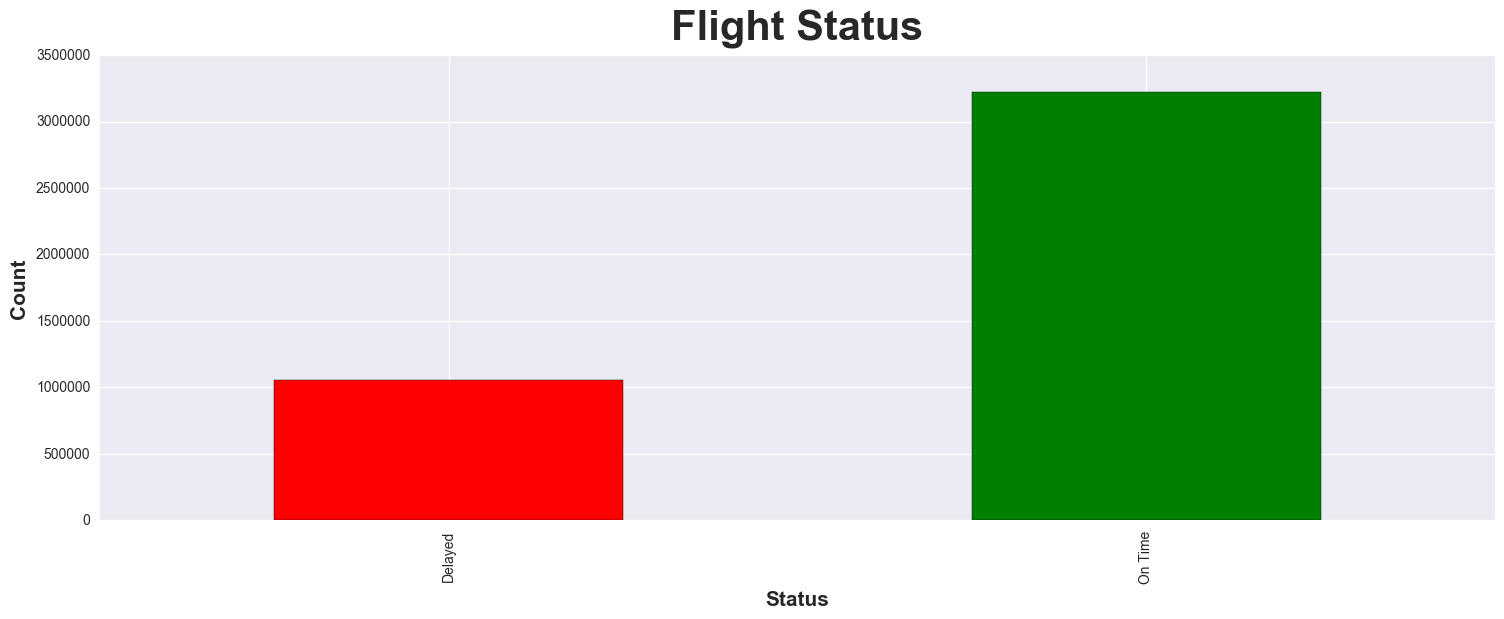

In [14]:
# Count of flights by status

plt.rc("figure", figsize=(18, 6))
c = df.groupby('Status')
c['Status'].count().plot(kind='bar', color =['red', 'green'])
plt.title('Flight Status',fontsize=30,fontweight="bold", va='bottom')
plt.ylabel('Count',fontsize=15,fontweight="bold")
plt.xlabel('Status',fontsize=15,fontweight="bold")
print(c['Status'].count())
plt.show()
#fig.savefig('/Users/sonalichaudhari/Desktop/ADS_Project/EDA/Graph/fig.png')

Status
Delayed    1053607
On Time    3222850
Name: Status, dtype: int64


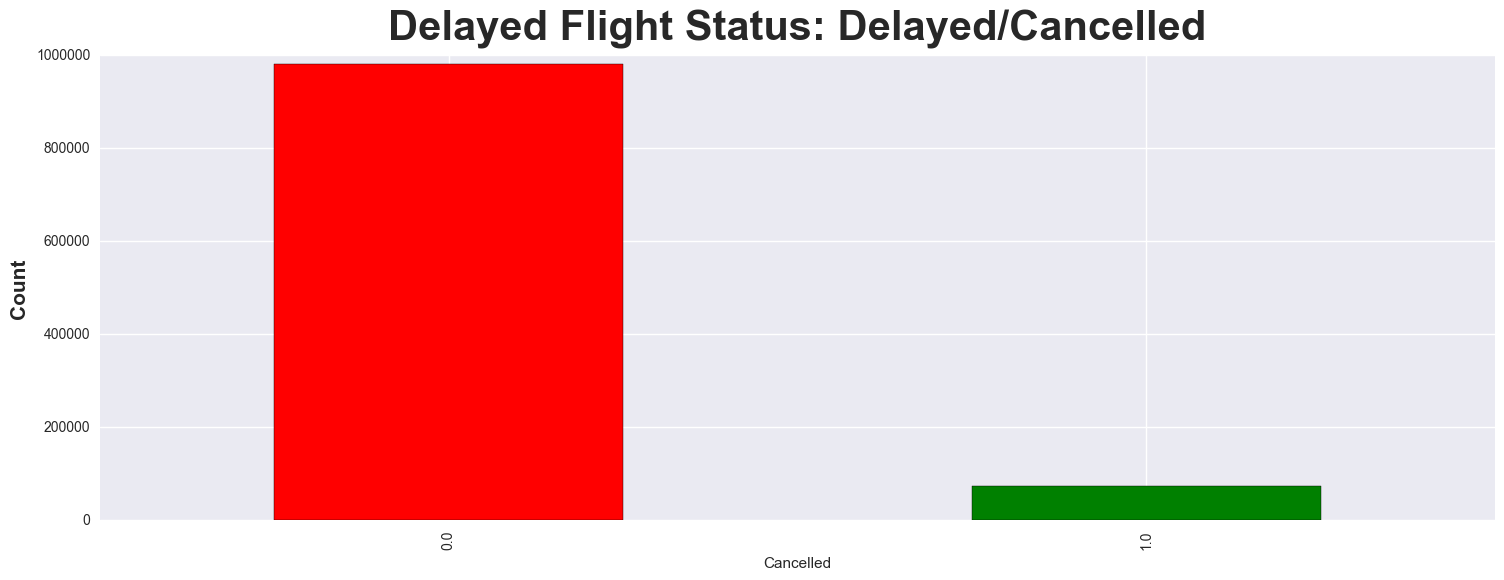

In [15]:
s = df[df['Status']=='Delayed'].groupby("Cancelled")
s['Cancelled'].count().plot(kind='bar', color =['red', 'green'])
plt.title('Delayed Flight Status: Delayed/Cancelled',fontsize=30,fontweight="bold", va='bottom')
plt.ylabel('Count',fontsize=15,fontweight="bold")
print(c['Status'].count())
plt.show()

## Mapping of LOOKup Tables

In [16]:
cancel = pd.read_csv(cur_path+'/Lookup/CancellationCode.csv', low_memory=False)
airport = pd.read_csv(cur_path+'/Lookup/AirportID.csv', low_memory=False)
carrier = pd.read_csv(cur_path+'/Lookup/UniqueCarrier.csv', low_memory=False)
origin = pd.read_csv(cur_path+'/Lookup/Origin.csv', low_memory=False)

In [17]:
cancel_dict = cancel.set_index('Code').T.to_dict('list')
origin_dict = origin.set_index('Code').T.to_dict('list')
airport_dict = airport.set_index('Code').T.to_dict('list')
carrier_dict = carrier.set_index('Code').T.to_dict('list')

In [18]:
# Delayed flight counts by Day of week

df.pivot_table(values=['index'], index='DayOfWeek', columns='Status', aggfunc=lambda x: len(x)).reset_index()

Status,DayOfWeek,Delayed,On Time
0,1,170847,464401
1,2,140465,479054
2,3,147043,479500
3,4,171463,467452
4,5,175747,464986
5,6,110506,407767
6,7,137536,459690


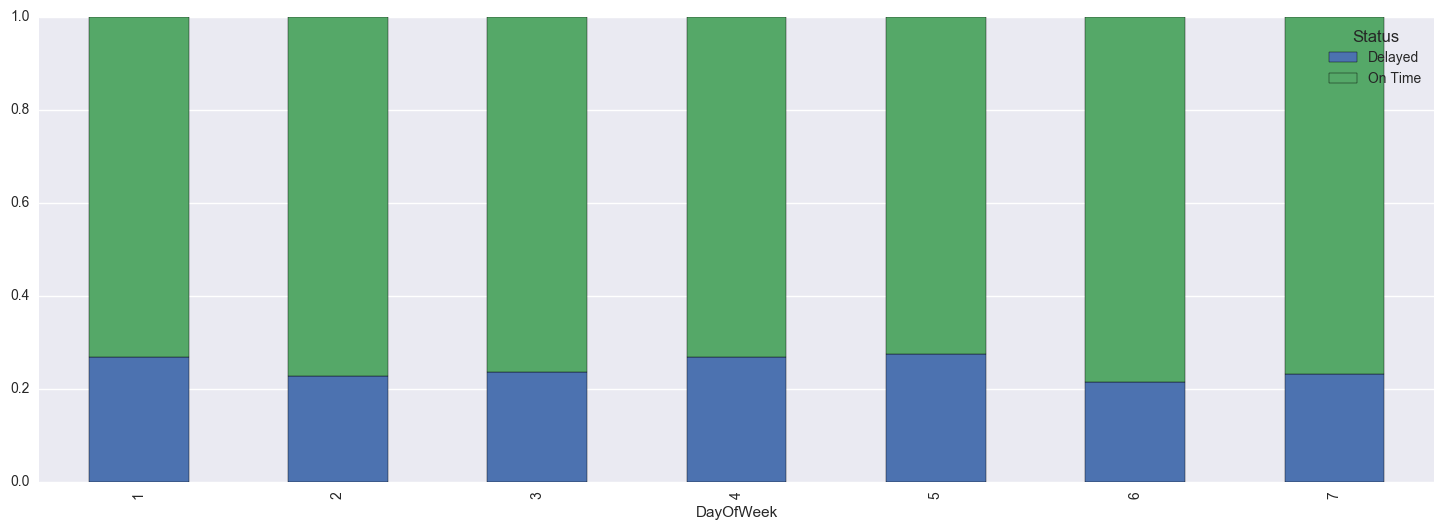

In [19]:
tps = df.pivot_table(values=['index'], index='DayOfWeek', columns='Status', aggfunc=lambda x: len(x))

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True)
tps
plt.show()

### Delay by Airports

In [20]:
#Creating id column

df = df.reset_index()
df['index'] = df.index +1
#df=df.rename(columns = {'index':'id'})

In [21]:
df['Origin'].nunique()

315

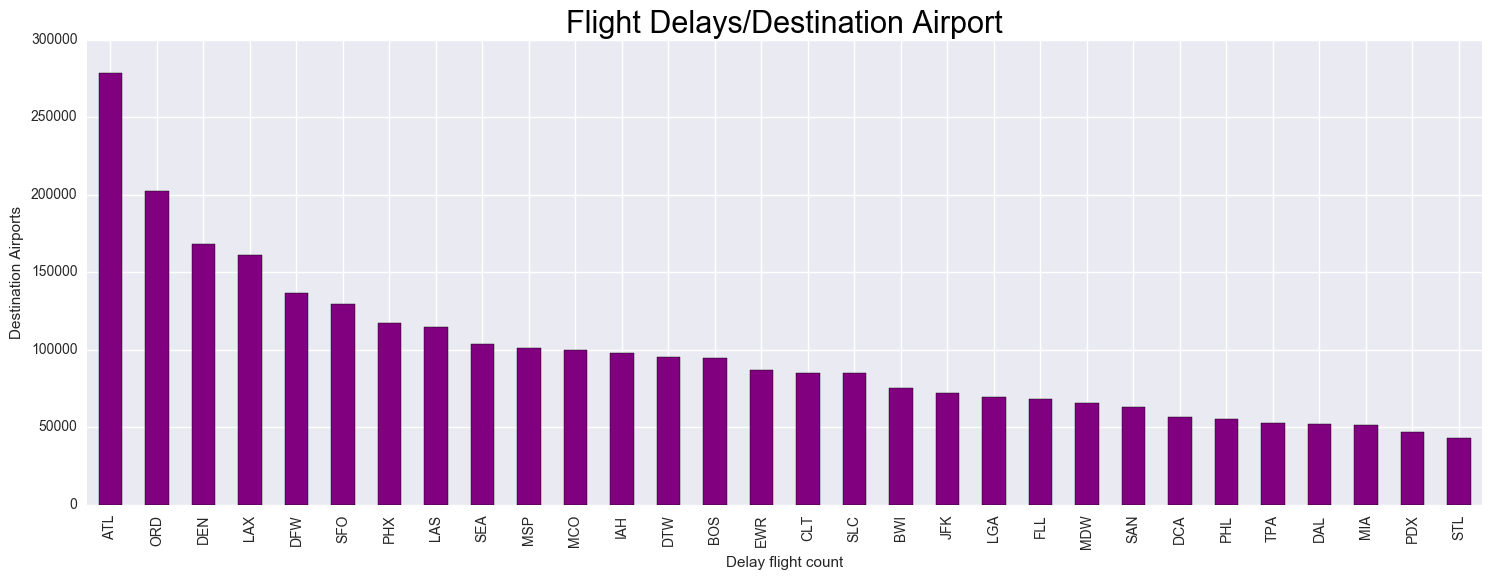

In [22]:
df.groupby('Dest')['index'].count().sort_values(ascending=0)[:30].plot(kind='bar',color='Purple')
plt.xlabel('Delay flight count')
plt.ylabel('Destination Airports')
plt.title('Flight Delays/Destination Airport',size=22,color="black")
plt.show()

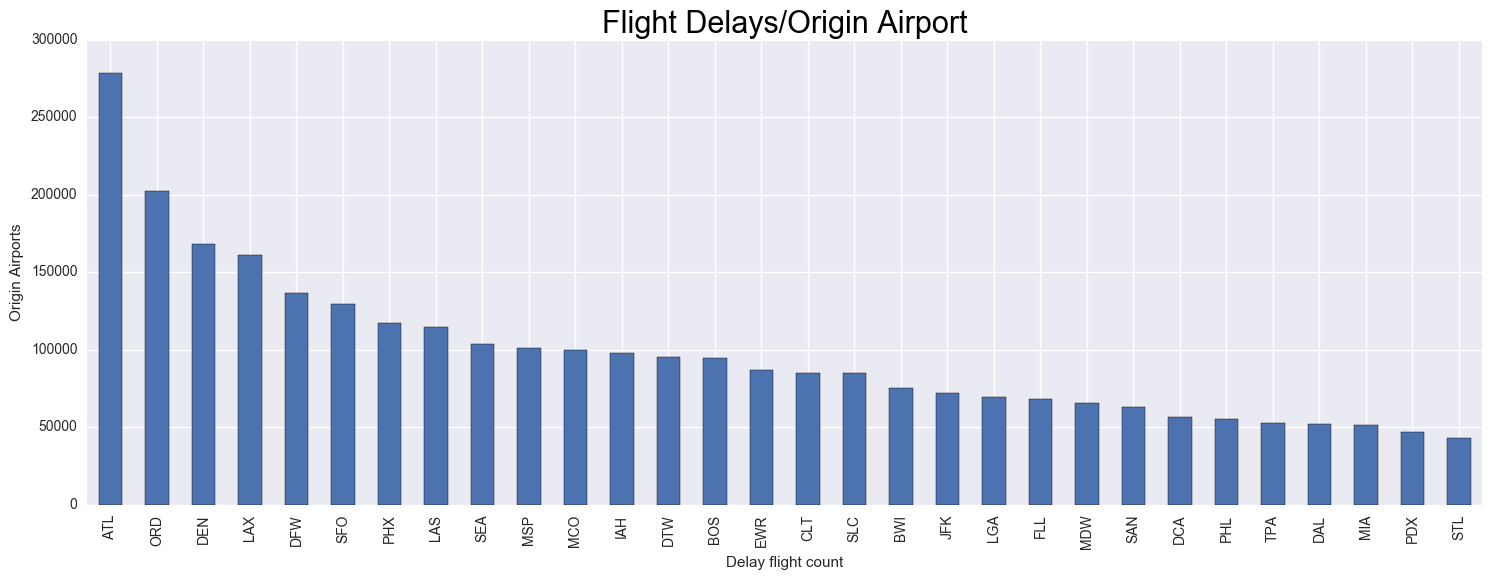

In [23]:
df.groupby('Origin')['index'].count().sort_values(ascending=0)[:30].plot(kind='bar')
plt.xlabel('Delay flight count')
plt.ylabel('Origin Airports')
plt.title('Flight Delays/Origin Airport',size=22,color="black")
plt.show()

In [24]:
df[['ArrDelay','DepDelay']].describe()

,ArrDelay,DepDelay
count,4.193597e+06,4.205785e+06
mean,5.573510e+00,1.063199e+01
std,4.698360e+01,4.502500e+01
min,-2.380000e+02,-2.340000e+02
25%,-1.400000e+01,-5.000000e+00
50%,-5.000000e+00,-2.000000e+00
75%,8.000000e+00,7.000000e+00
max,1.944000e+03,2.755000e+03


### Delay by Airline

In [25]:
df['Carrier'].unique()

array(['AA', 'B6', 'DL', 'EV', 'F9', 'HA', 'NK', 'OO', 'UA', 'WN', 'AS',
       'VX'], dtype=object)

In [26]:
df['Carrier'].nunique()

12

In [27]:
airport_dict[16386][0].split(',')[1].split(':')[1]

' Aua Island Airport'

In [28]:
df['Airline'] = df['UniqueCarrier'].apply(lambda x: carrier_dict[x][0])

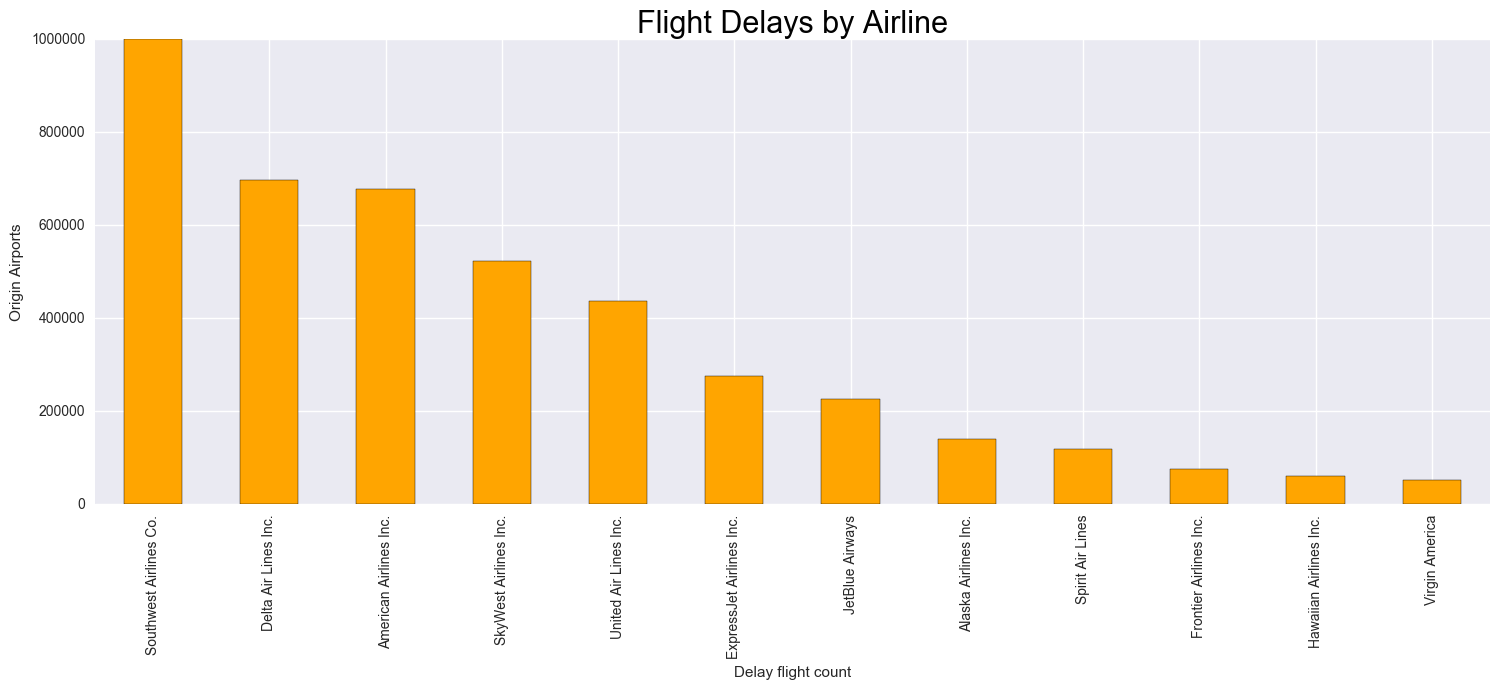

In [29]:
df.groupby('Airline')['index'].count().sort_values(ascending=0).plot(kind='bar',color="orange")
plt.xlabel('Delay flight count')
plt.ylabel('Origin Airports')
plt.title('Flight Delays by Airline',size=22,color="black")
plt.show()

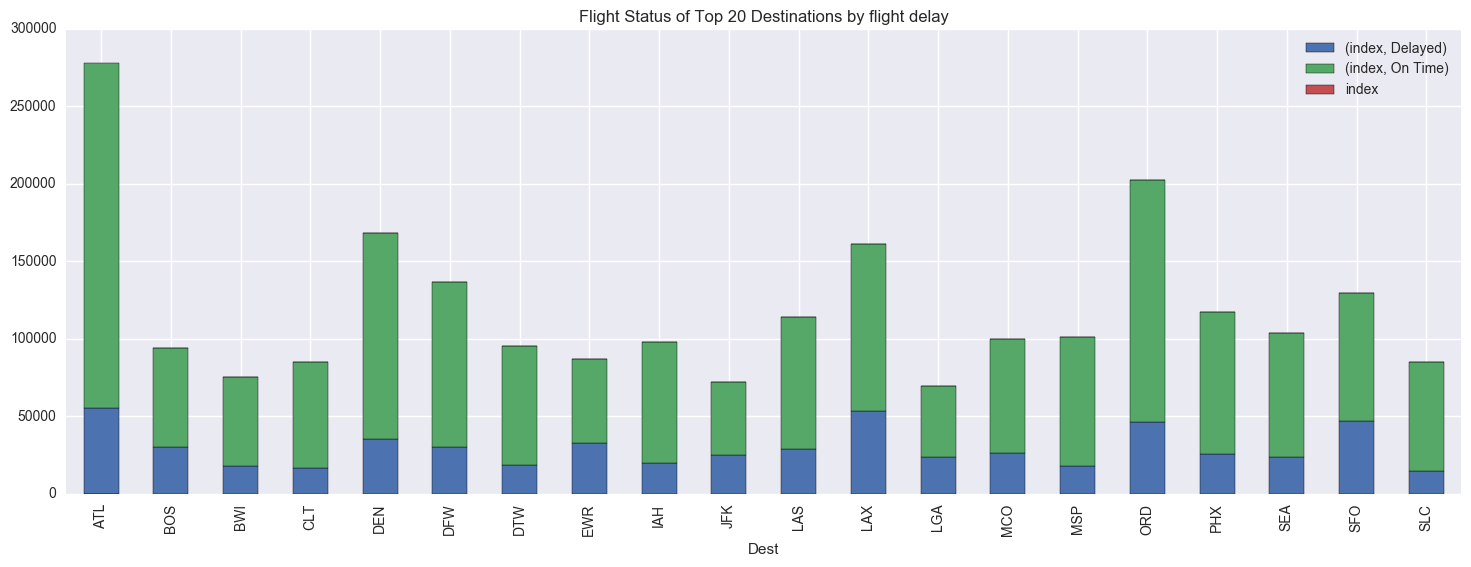

In [33]:
s = df.pivot_table(values=['index'], index='Dest', columns='Status', aggfunc=lambda x: len(x)).reset_index()
d2  = df.groupby('Dest')['index'].count().sort_values(ascending=0)[:20].to_frame().reset_index()['Dest']
d2 = d2.to_frame().reset_index()
s = pd.merge(s,d2, on ='Dest', how ='right')
s = s.set_index('Dest')
s.plot(kind='bar',stacked=True,title="Flight Status of Top 20 Destinations by flight delay",legend=True,)
plt.show()

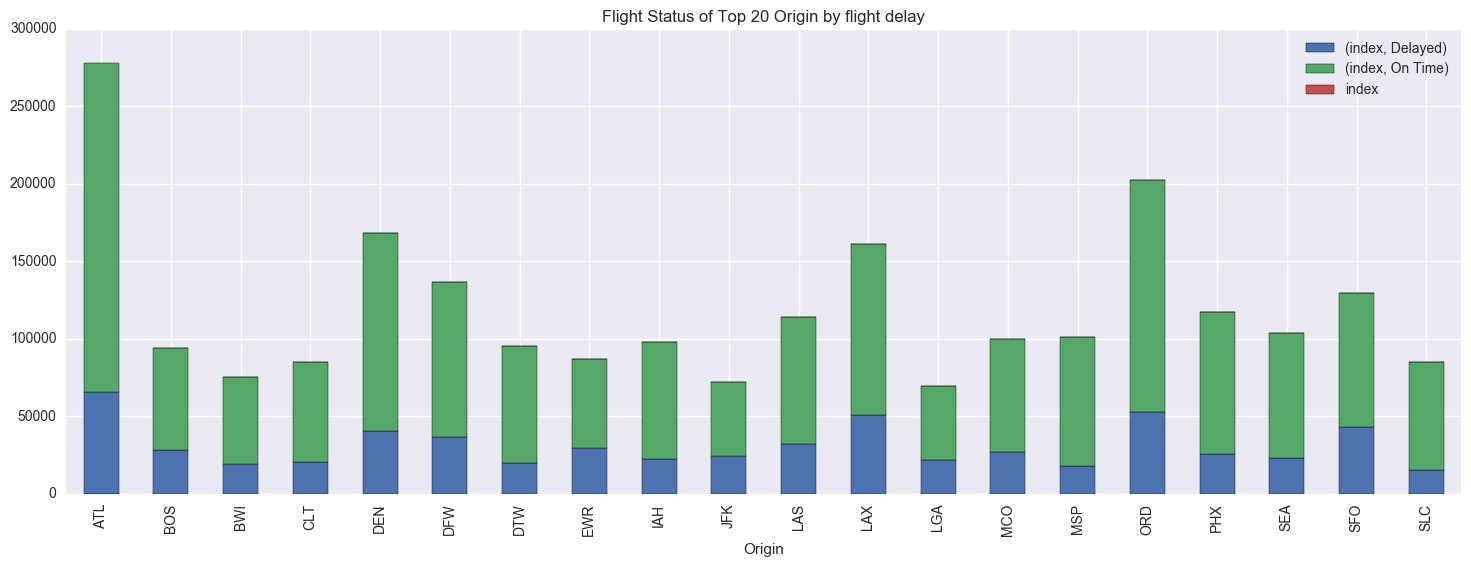

In [34]:
s = df.pivot_table(values=['index'], index='Origin', columns='Status', aggfunc=lambda x: len(x)).reset_index()
d2  = df.groupby('Origin')['index'].count().sort_values(ascending=0)[:20].to_frame().reset_index()['Origin']
d2 = d2.to_frame().reset_index()
s = pd.merge(s,d2, on ='Origin', how ='right')
s = s.set_index('Origin')
s.plot(kind='bar',stacked=True,title="Flight Status of Top 20 Origin by flight delay",legend=True,)
plt.show()

Nan:  70672
Nan:  82860


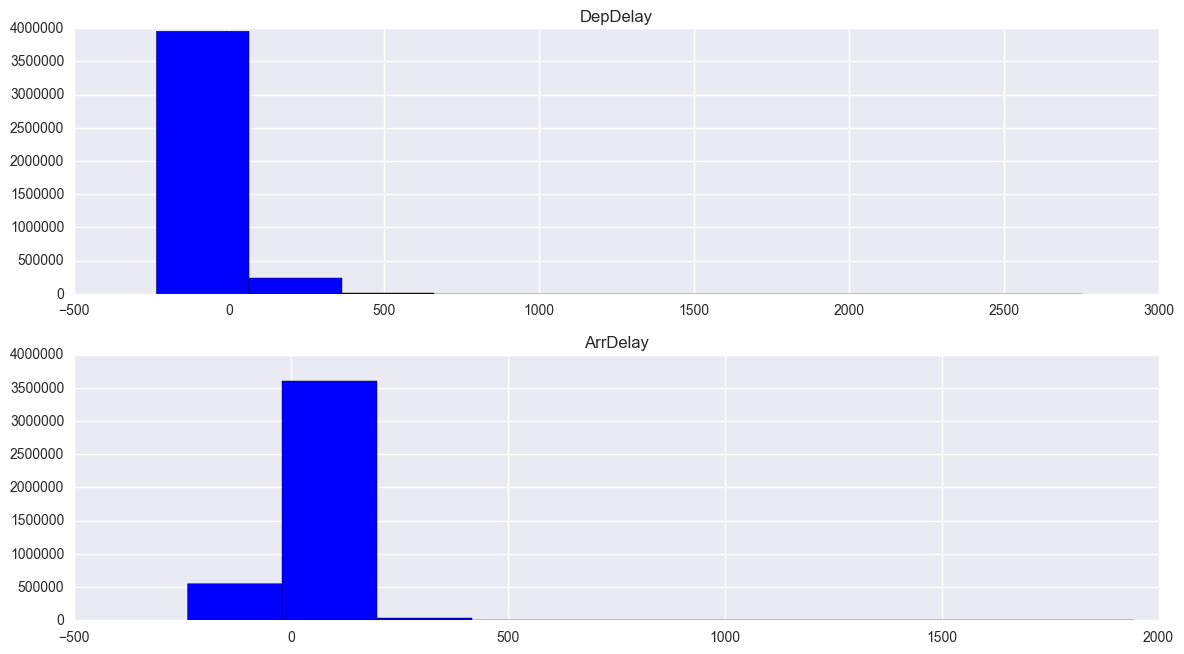

In [35]:
fig  = plt.figure(figsize=(12, 13), dpi=100);
sns.set(font_scale = 1)
axes1 = fig.add_subplot(411) 
axes2 = fig.add_subplot(412) 
print ('Nan: ',df['DepDelay'].isnull().sum())
ax1 = df.hist('DepDelay', color = 'Blue',ax=axes1);
print ('Nan: ',df['ArrDelay'].isnull().sum())
ax2 = df.hist('ArrDelay', color = 'Blue',ax=axes2);

fig.tight_layout()
plt.show()

Nan:  70672
Nan:  82860


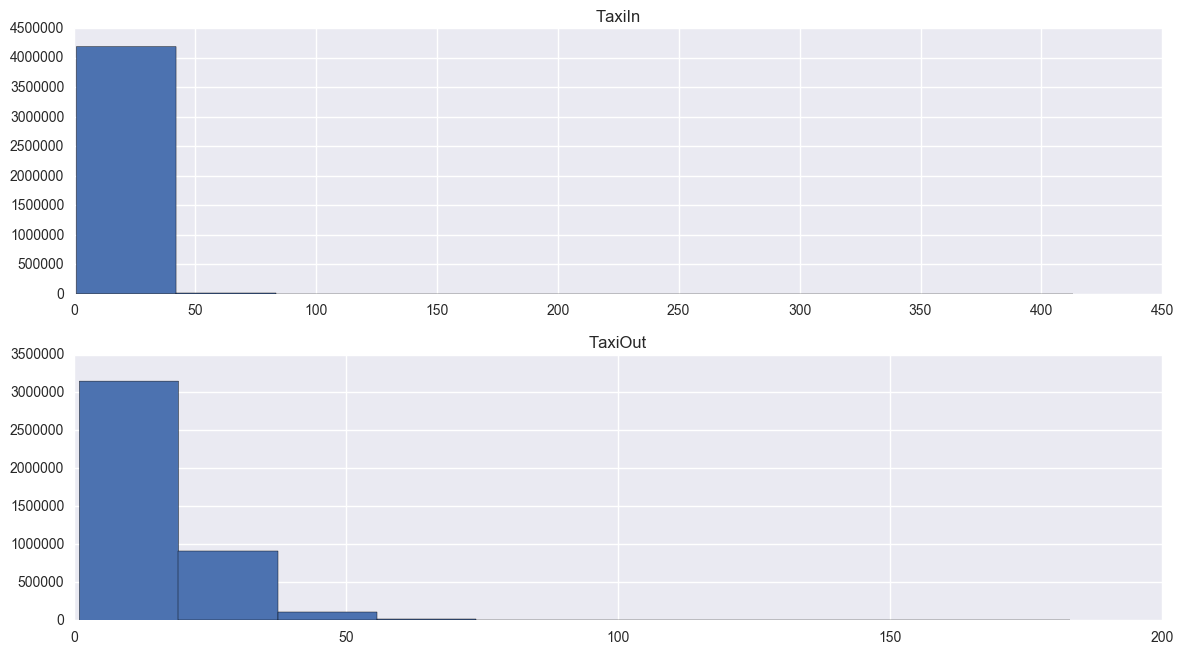

In [36]:
fig  = plt.figure(figsize=(12, 13), dpi=100);
sns.set(font_scale = 1)
axes1 = fig.add_subplot(411) 
axes2 = fig.add_subplot(412) 
print ('Nan: ',df['DepDelay'].isnull().sum())
ax1 = df.hist('TaxiIn',ax=axes1);
print ('Nan: ',df['ArrDelay'].isnull().sum())
ax2 = df.hist('TaxiOut',ax=axes2);

fig.tight_layout()
plt.show()

Nan:  72211
Nan:  74220


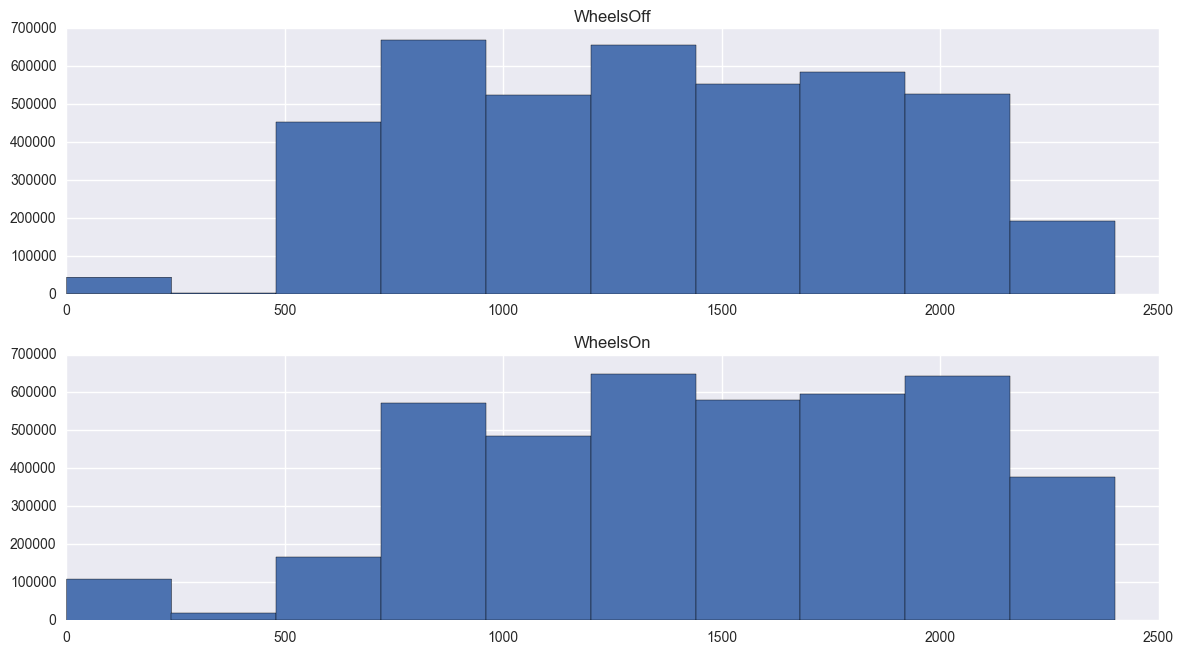

In [37]:
fig  = plt.figure(figsize=(12, 13), dpi=100);
sns.set(font_scale = 1)
axes1 = fig.add_subplot(411) 
axes2 = fig.add_subplot(412) 
print ('Nan: ',df['WheelsOff'].isnull().sum())
ax1 = df.hist('WheelsOff',ax=axes1);
print ('Nan: ',df['WheelsOn'].isnull().sum())
ax2 = df.hist('WheelsOn',ax=axes2);

fig.tight_layout()
plt.show()

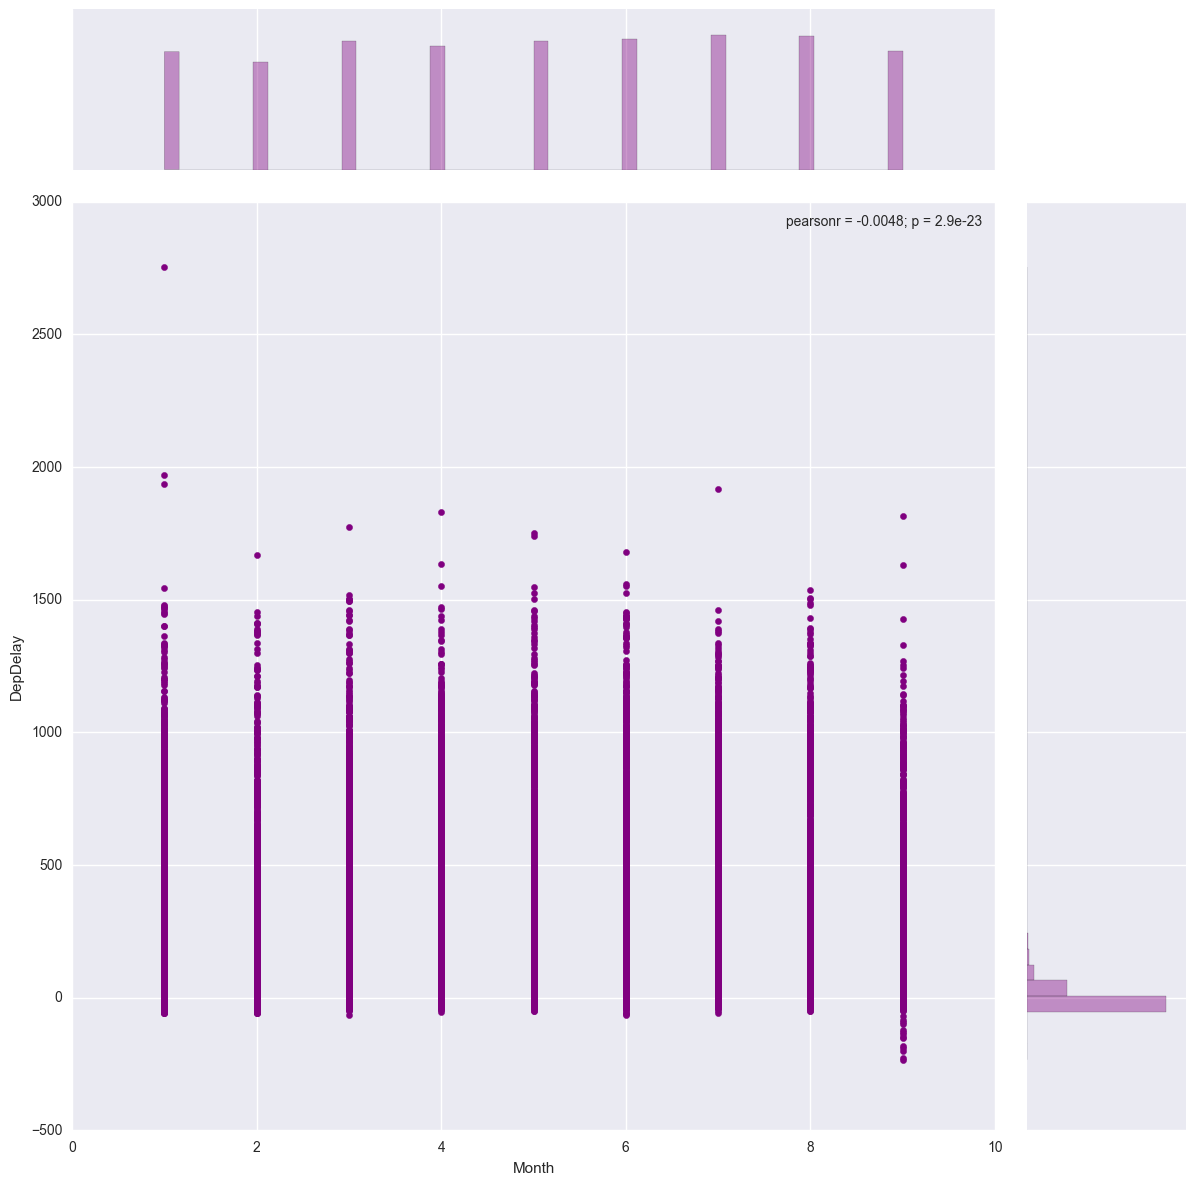

In [38]:
# Departure delay distribution over Months

plt.figure(figsize=(12,12), dpi=100)
sns.set(font_scale = 1)
sns.jointplot(x='Month', y='DepDelay', data=df, size=12, color='purple');
plt.show()

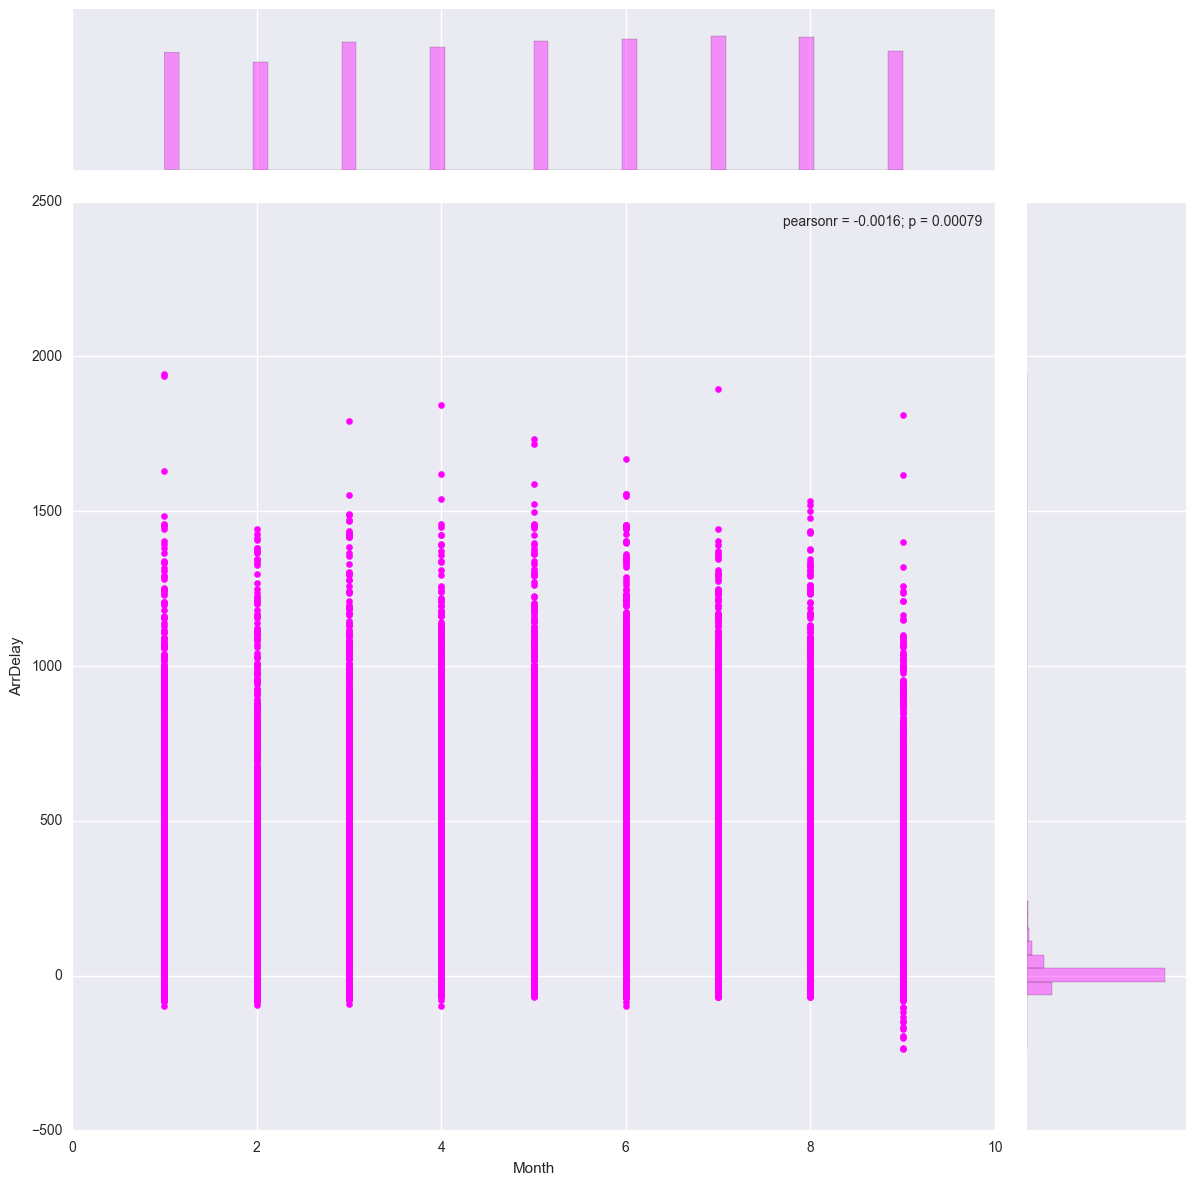

In [39]:
# Arrival delay distribution over Months
plt.figure(figsize=(12,12), dpi=100)
sns.set(font_scale = 1)
sns.jointplot(x='Month', y='ArrDelay', data=df, size=12, color='magenta');
plt.show()

In [40]:
#sns.lmplot(x='Origin', y='DepDelay', data=df, fit_reg=False)

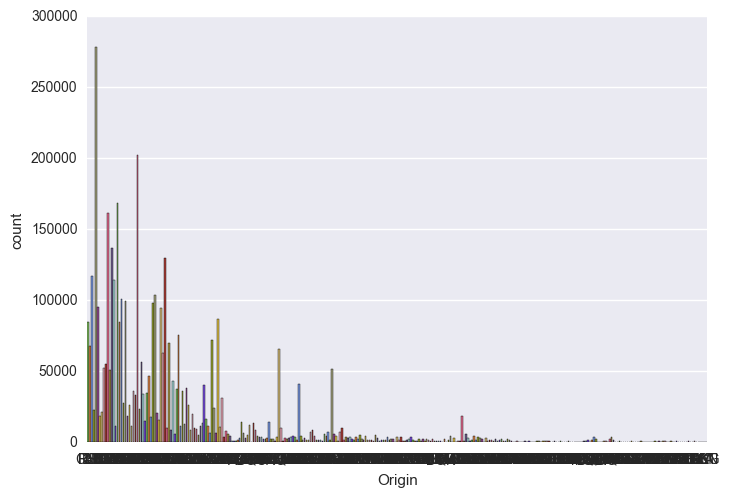

In [43]:
sns.countplot(x='Origin', data=df, palette=pkmn_type_colors)
plt.show()

In [42]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

In [44]:
df['Origin'].nunique()

315

In [45]:
# Loading the lookup csvs and converting them into list
cancel = pd.read_csv(cur_path+'/Lookup/CancellationCode.csv', low_memory=False)
airport = pd.read_csv(cur_path+'/Lookup/AirportID.csv', low_memory=False)
carrier = pd.read_csv(cur_path+'/Lookup/UniqueCarrier.csv', low_memory=False)
origin = pd.read_csv(cur_path+'/Lookup/Origin.csv', low_memory=False)
airline = pd.read_csv(cur_path+'/Lookup/Airline.csv', low_memory=False)

In [46]:
origin_dict = origin.set_index('Code').T.to_dict('list')
airport_dict = airport.set_index('Code').T.to_dict('list')
carrier_dict = carrier.set_index('Code').T.to_dict('list')
airline_dict = airline.set_index('Code').T.to_dict('list')
cancel_dict= cancel.set_index('Code').T.to_dict('list')

In [47]:
df['Airline'] = df['AirlineID'].apply(lambda x: airline_dict[x][0])

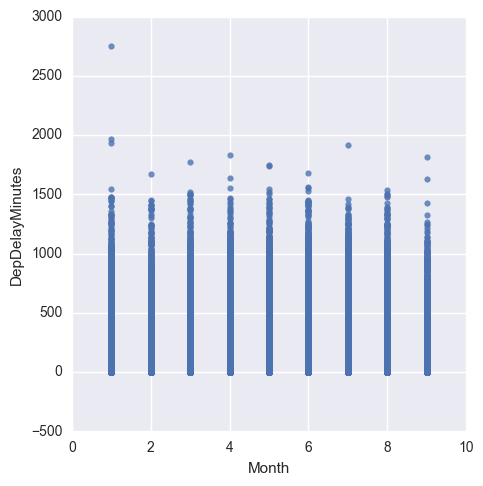

In [48]:
# Delay Minutes Distribution

sns.lmplot(x='Month', y='DepDelayMinutes', data=df, fit_reg=False)
plt.show()

In [49]:
df['DepDelayMinutes'].describe()

count    4.205785e+06
mean     1.367374e+01
std      4.394815e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      2.755000e+03
Name: DepDelayMinutes, dtype: float64

In [50]:
df['ArrDelayMinutes'].describe()

count    4.193597e+06
mean     1.376353e+01
std      4.353346e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.000000e+00
max      1.944000e+03
Name: ArrDelayMinutes, dtype: float64

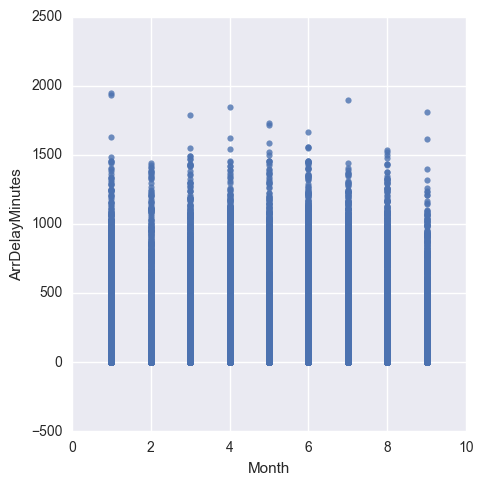

In [51]:
# Arrival Minutes Distribution
plt.figure(figsize=(20,10))
sns.lmplot(x='Month', y='ArrDelayMinutes', data=df, fit_reg=False)
plt.show()

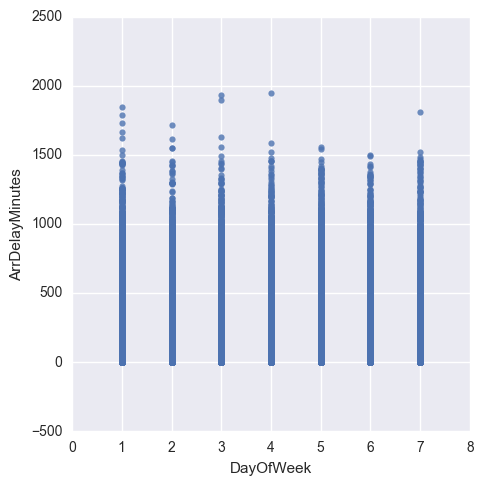

In [52]:
sns.lmplot(x='DayOfWeek', y='ArrDelayMinutes', data=df, fit_reg=False)
plt.show()

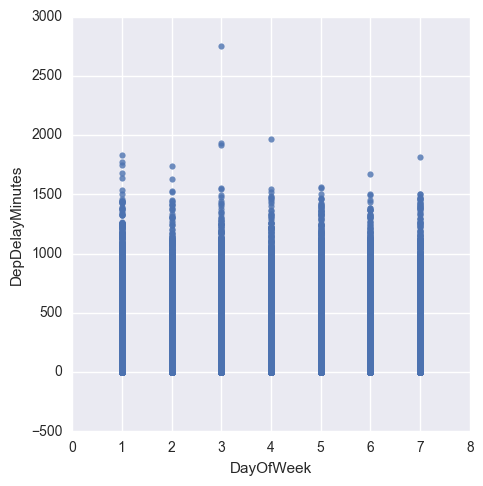

In [53]:
sns.lmplot(x='DayOfWeek', y='DepDelayMinutes', data=df, fit_reg=False)
plt.show()

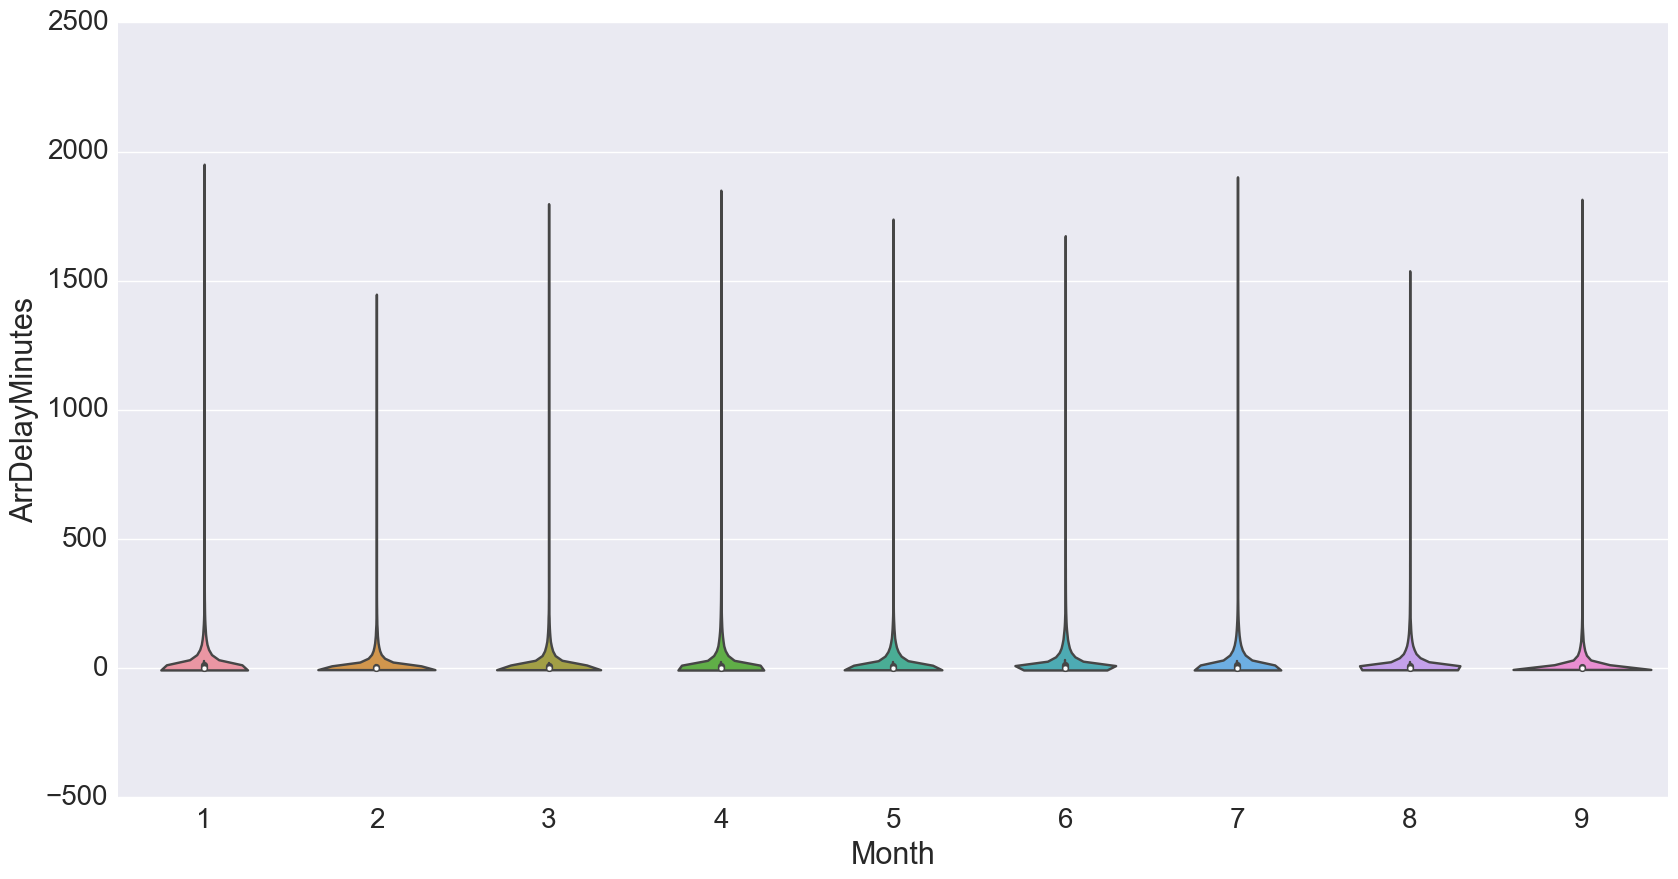

In [54]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.violinplot(x='Month', y='ArrDelayMinutes', data=df)
plt.show()

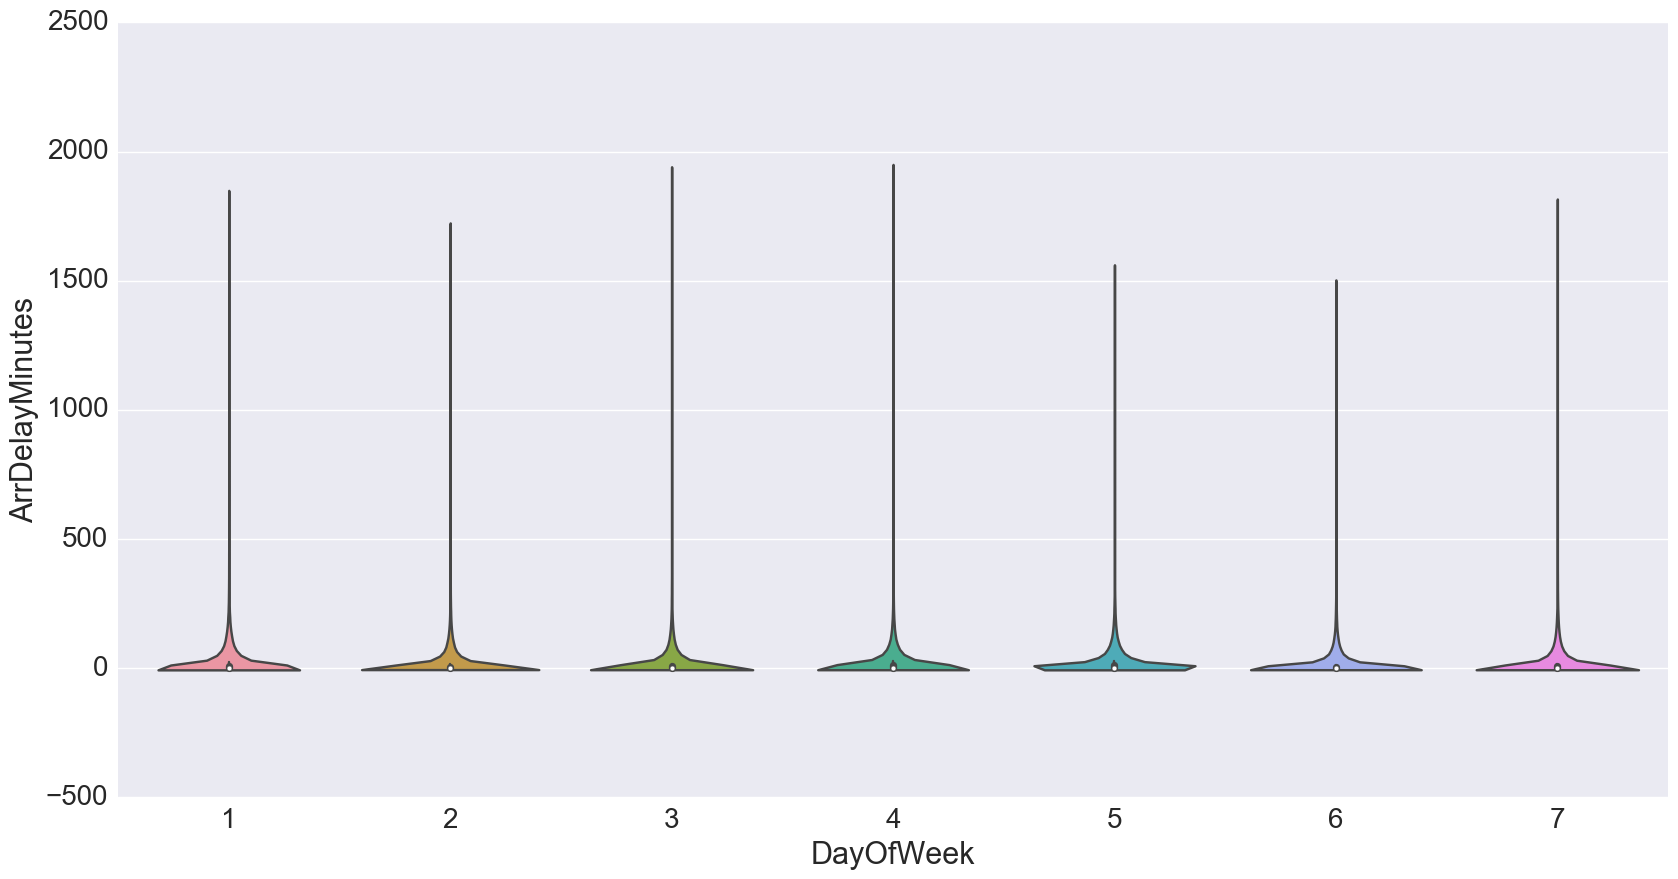

In [55]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.violinplot(x='DayOfWeek', y='ArrDelayMinutes', data=df)
plt.show()

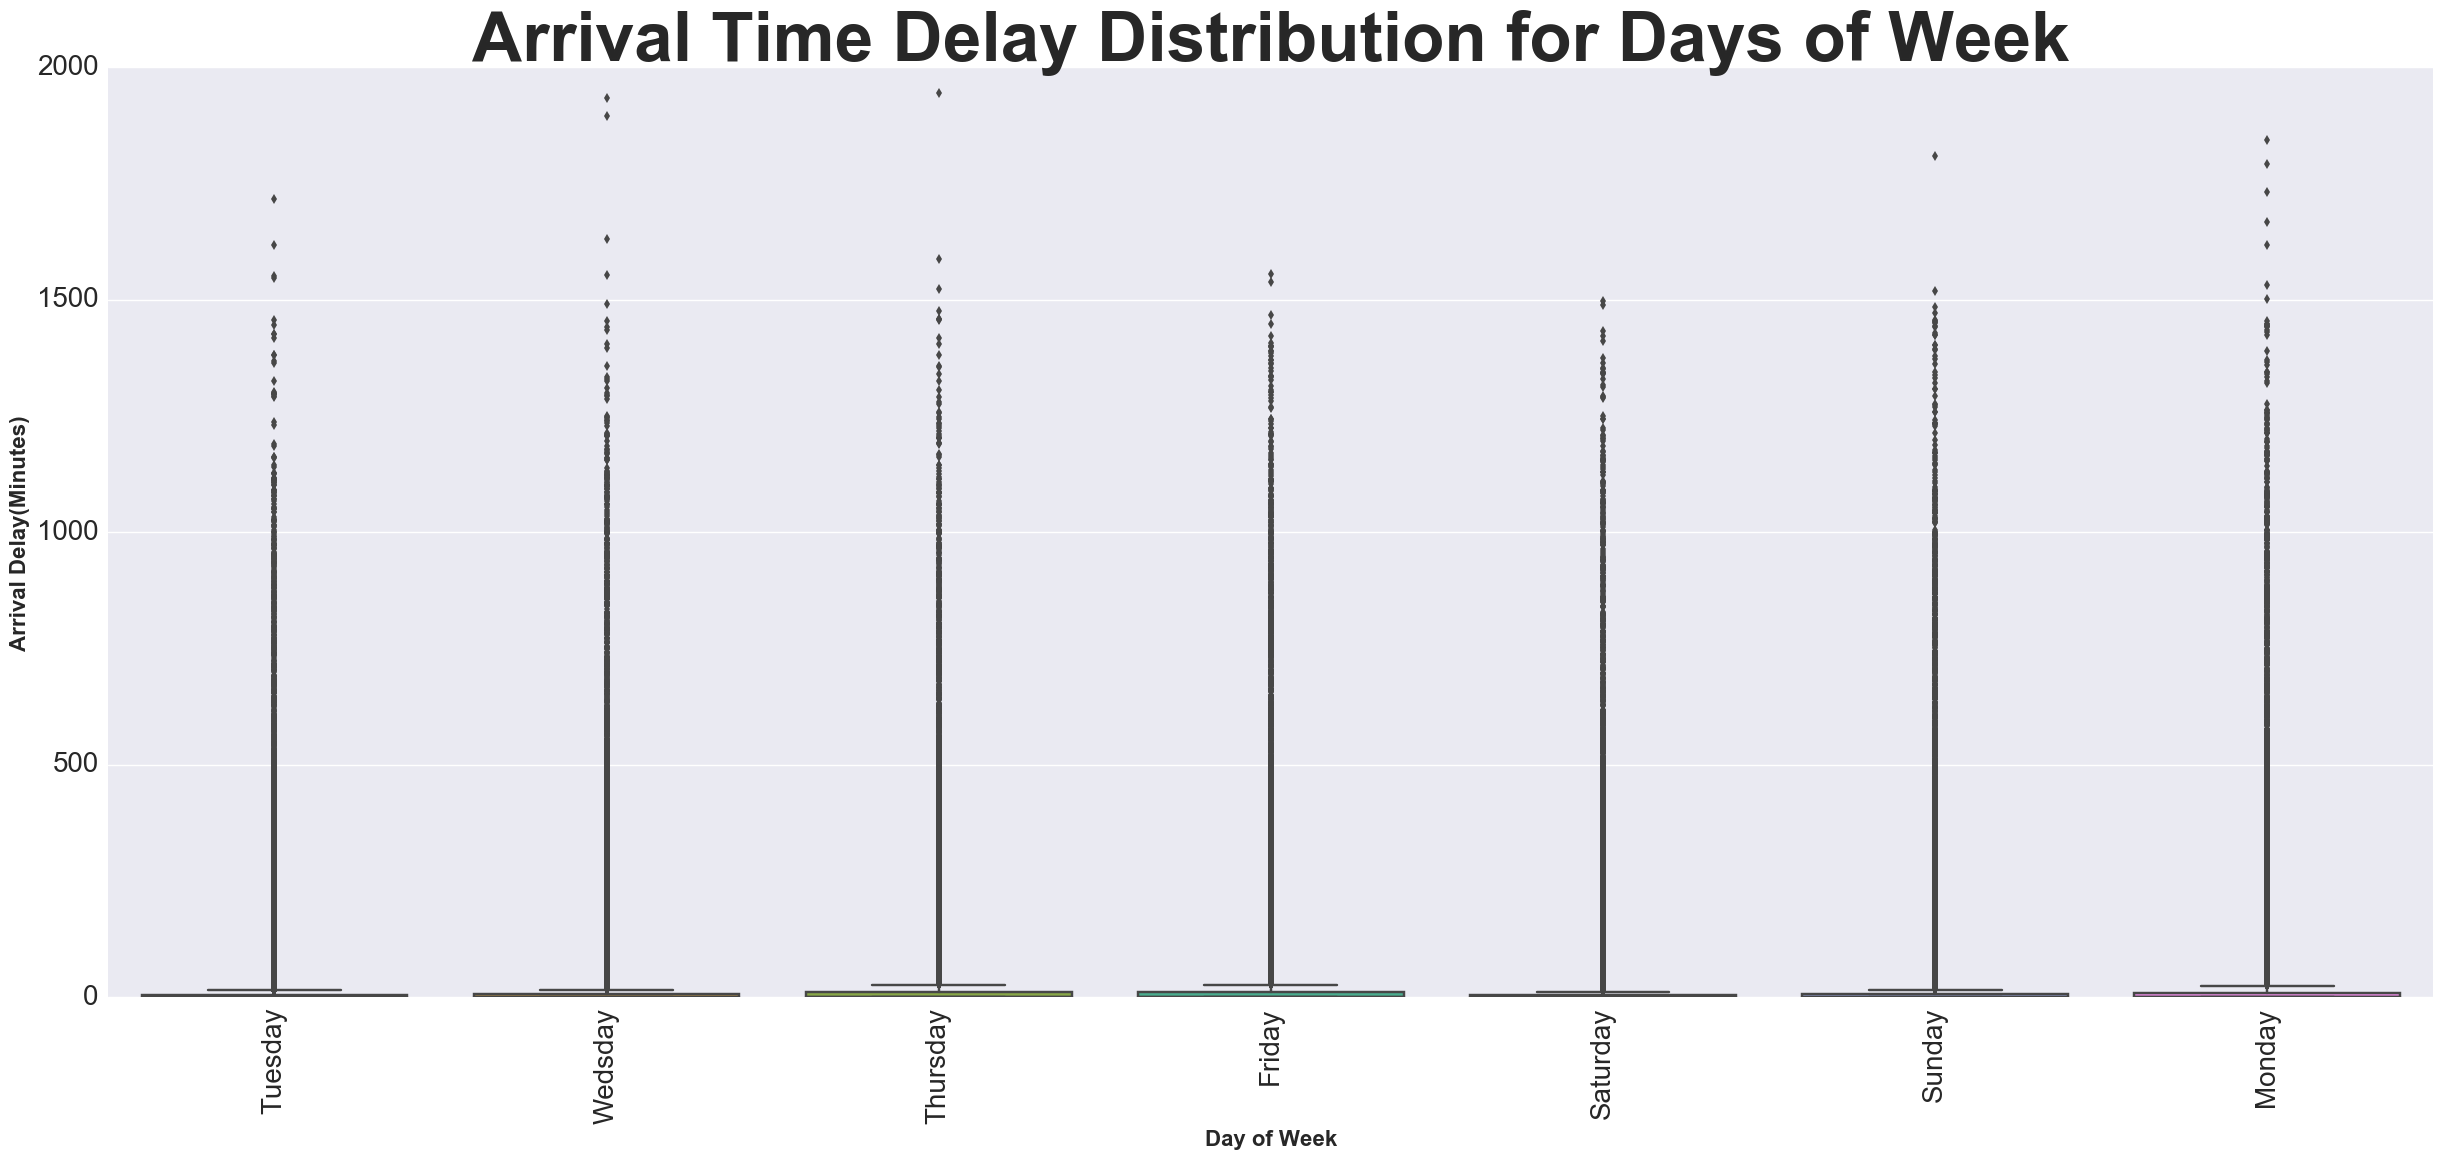

In [56]:
plt.figure(figsize=(30,12))
sns.boxplot(x="day", y="ArrDelayMinutes", data=df);
plt.ylabel('Arrival Delay(Minutes)', fontsize=16,fontweight="bold")
plt.xlabel('Day of Week', fontsize=16, fontweight="bold")
plt.xticks(rotation='vertical')
plt.title("Arrival Time Delay Distribution for Days of Week", fontsize=50, fontweight="bold")
plt.show()

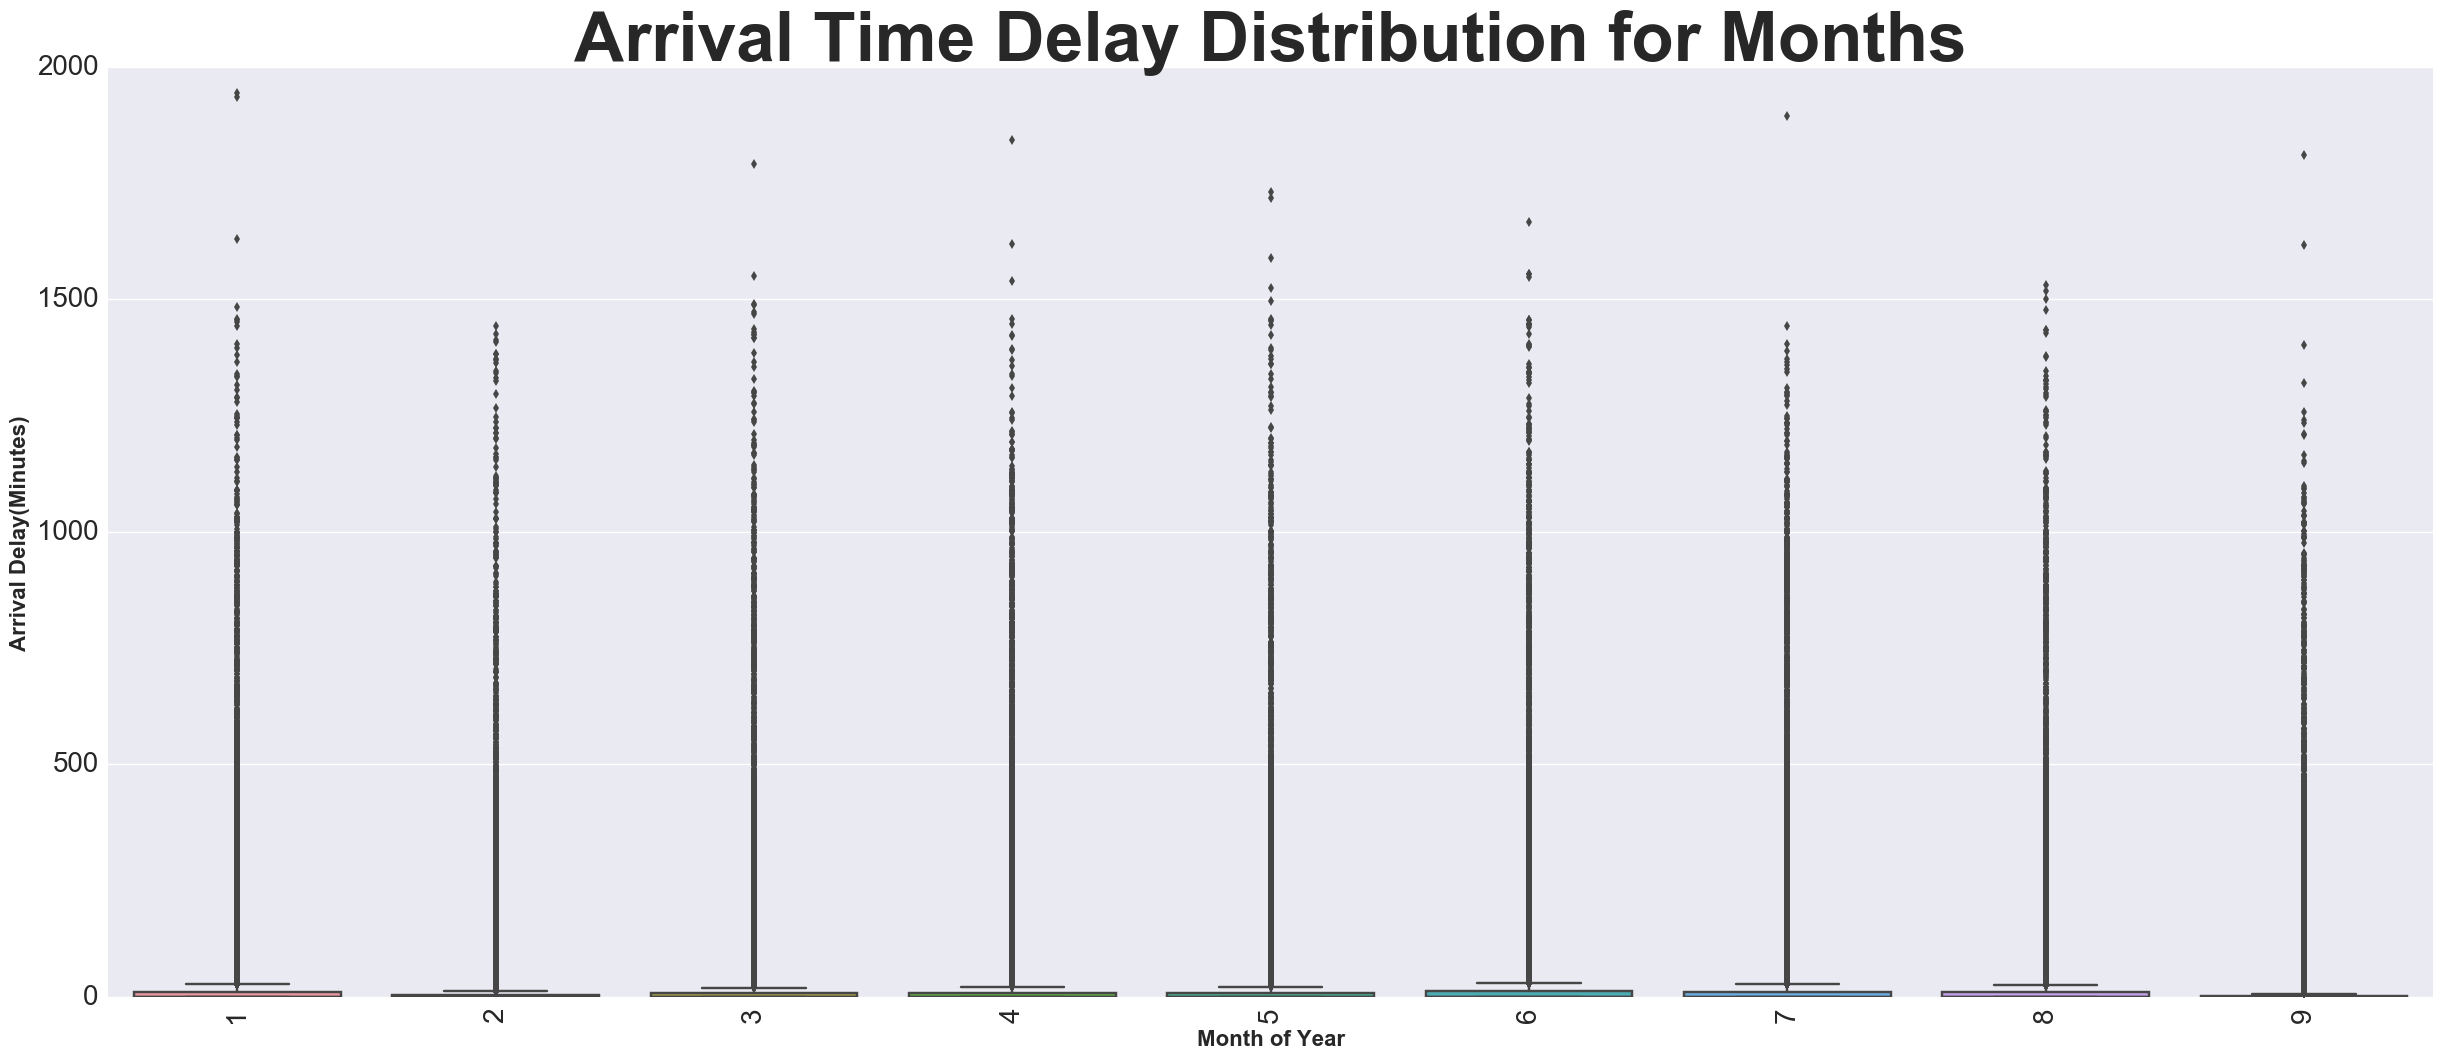

In [57]:
plt.figure(figsize=(30,12))
sns.boxplot(x="Month", y="ArrDelayMinutes", data=df);
plt.ylabel('Arrival Delay(Minutes)', fontsize=16,fontweight="bold")
plt.xlabel('Month of Year', fontsize=16, fontweight="bold")
plt.xticks(rotation='vertical')
plt.title("Arrival Time Delay Distribution for Months", fontsize=50, fontweight="bold")
plt.show()

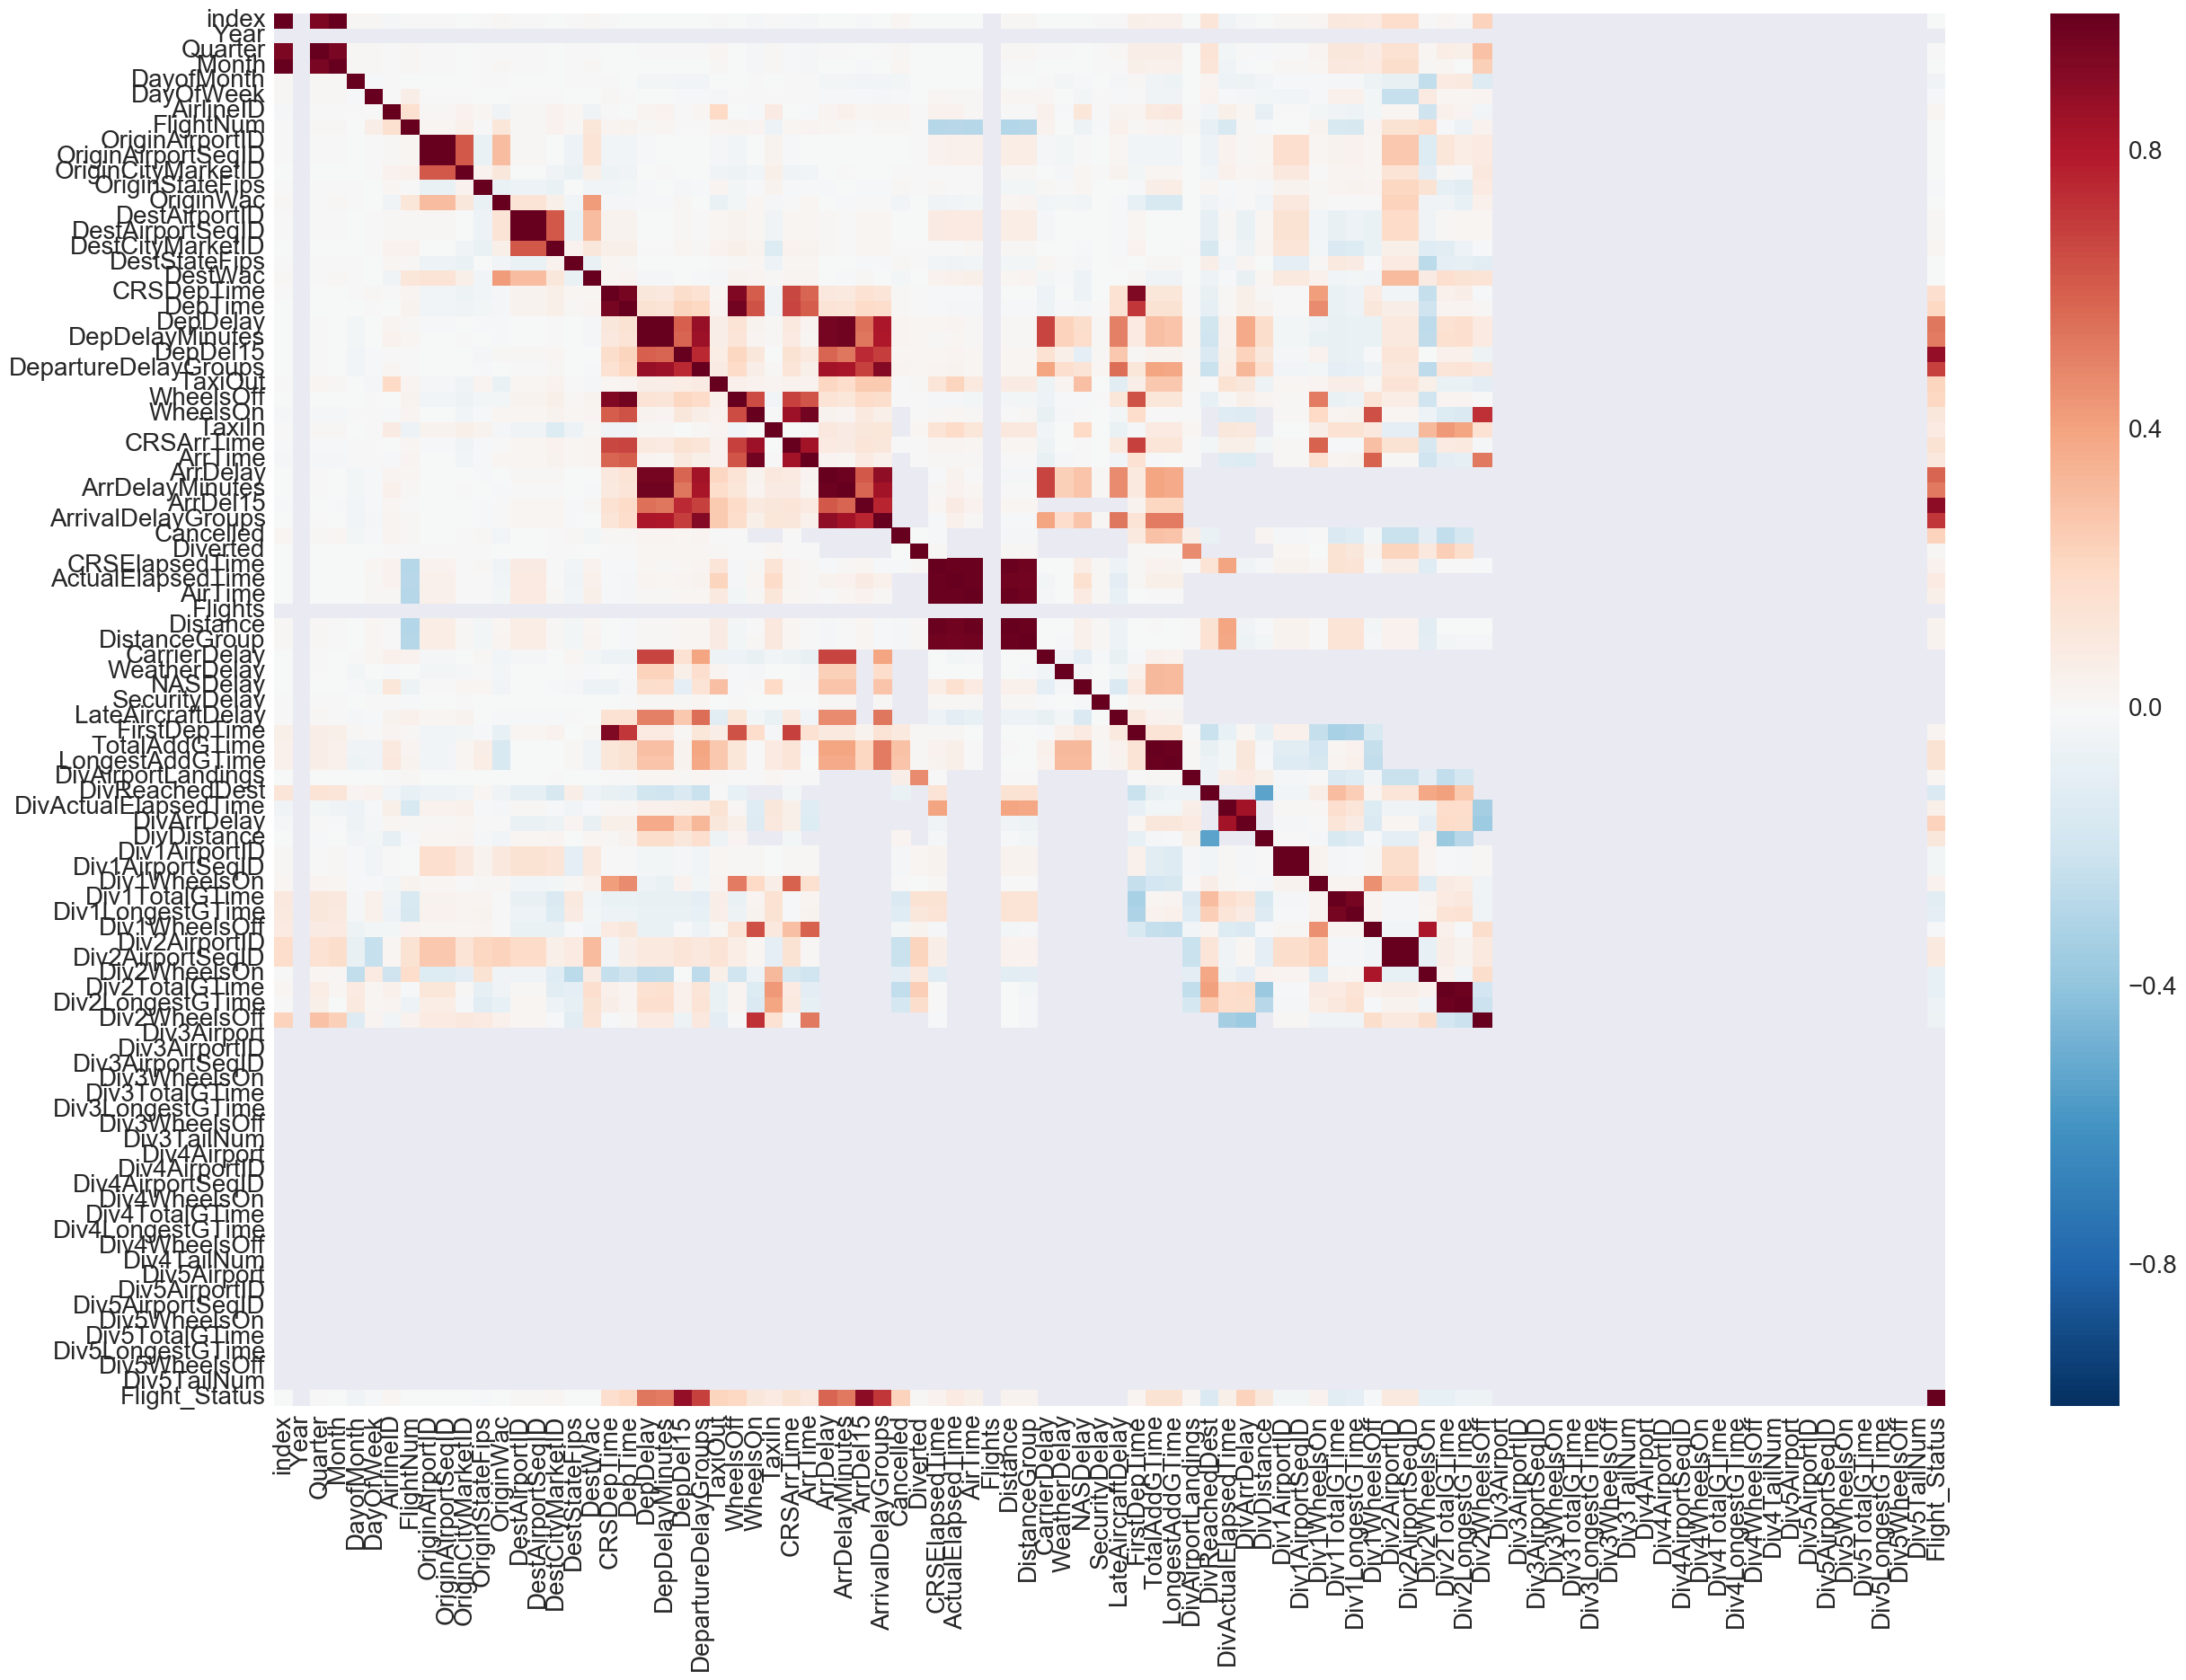

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

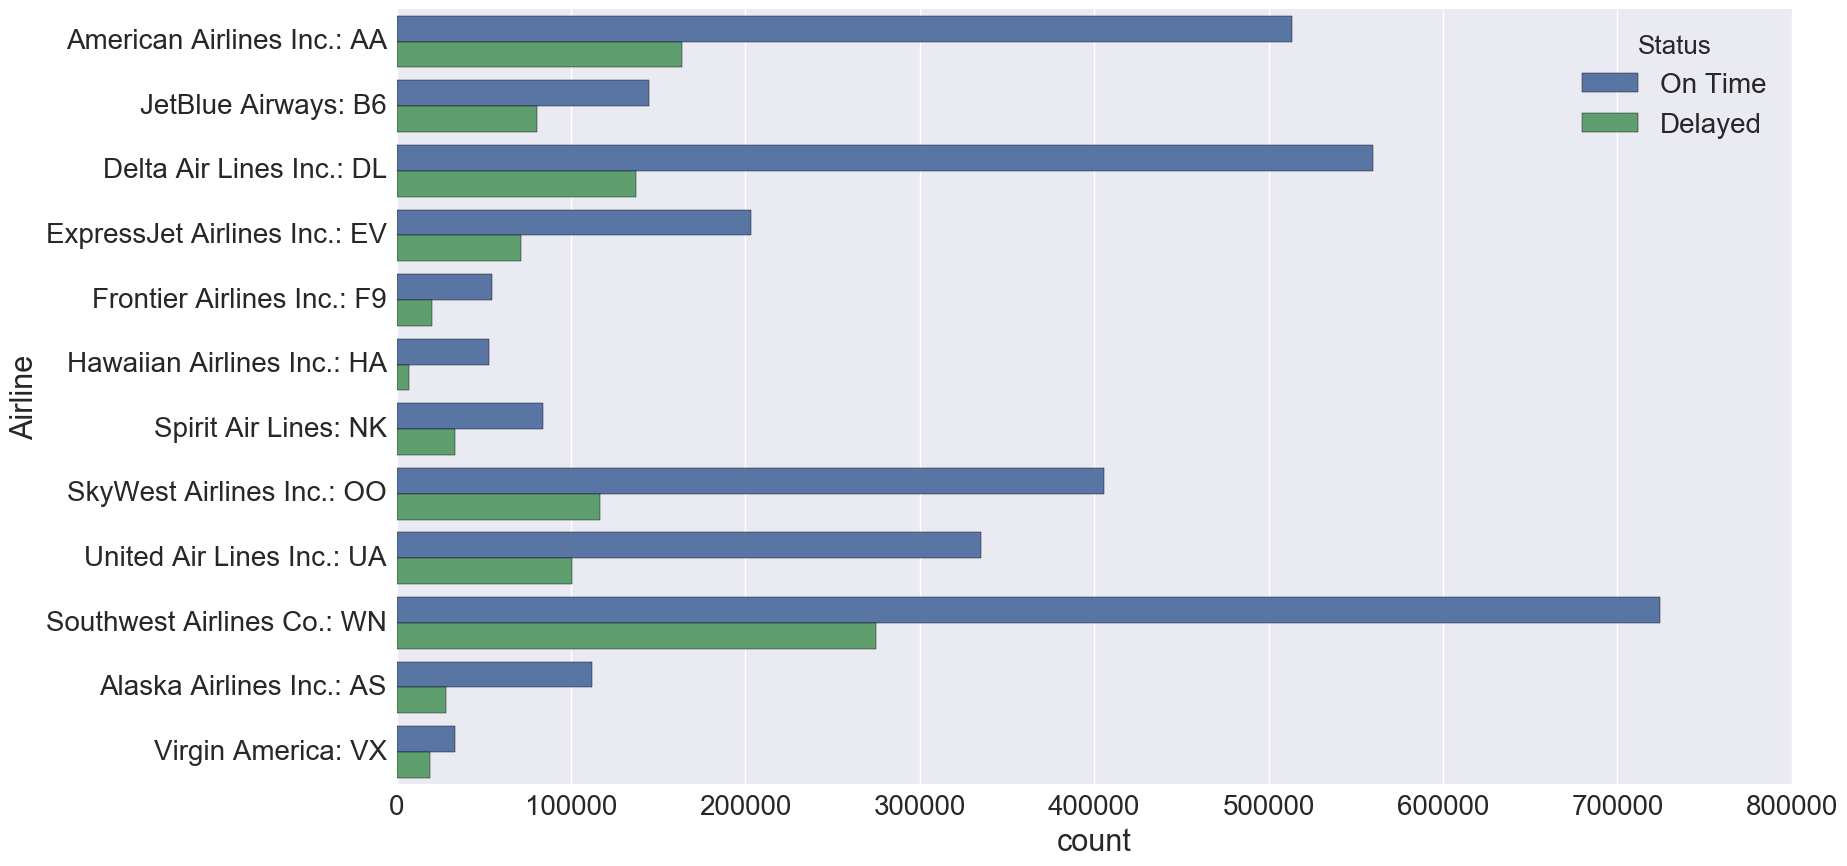

In [59]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(y="Airline", hue='Status', data=df)
plt.show()

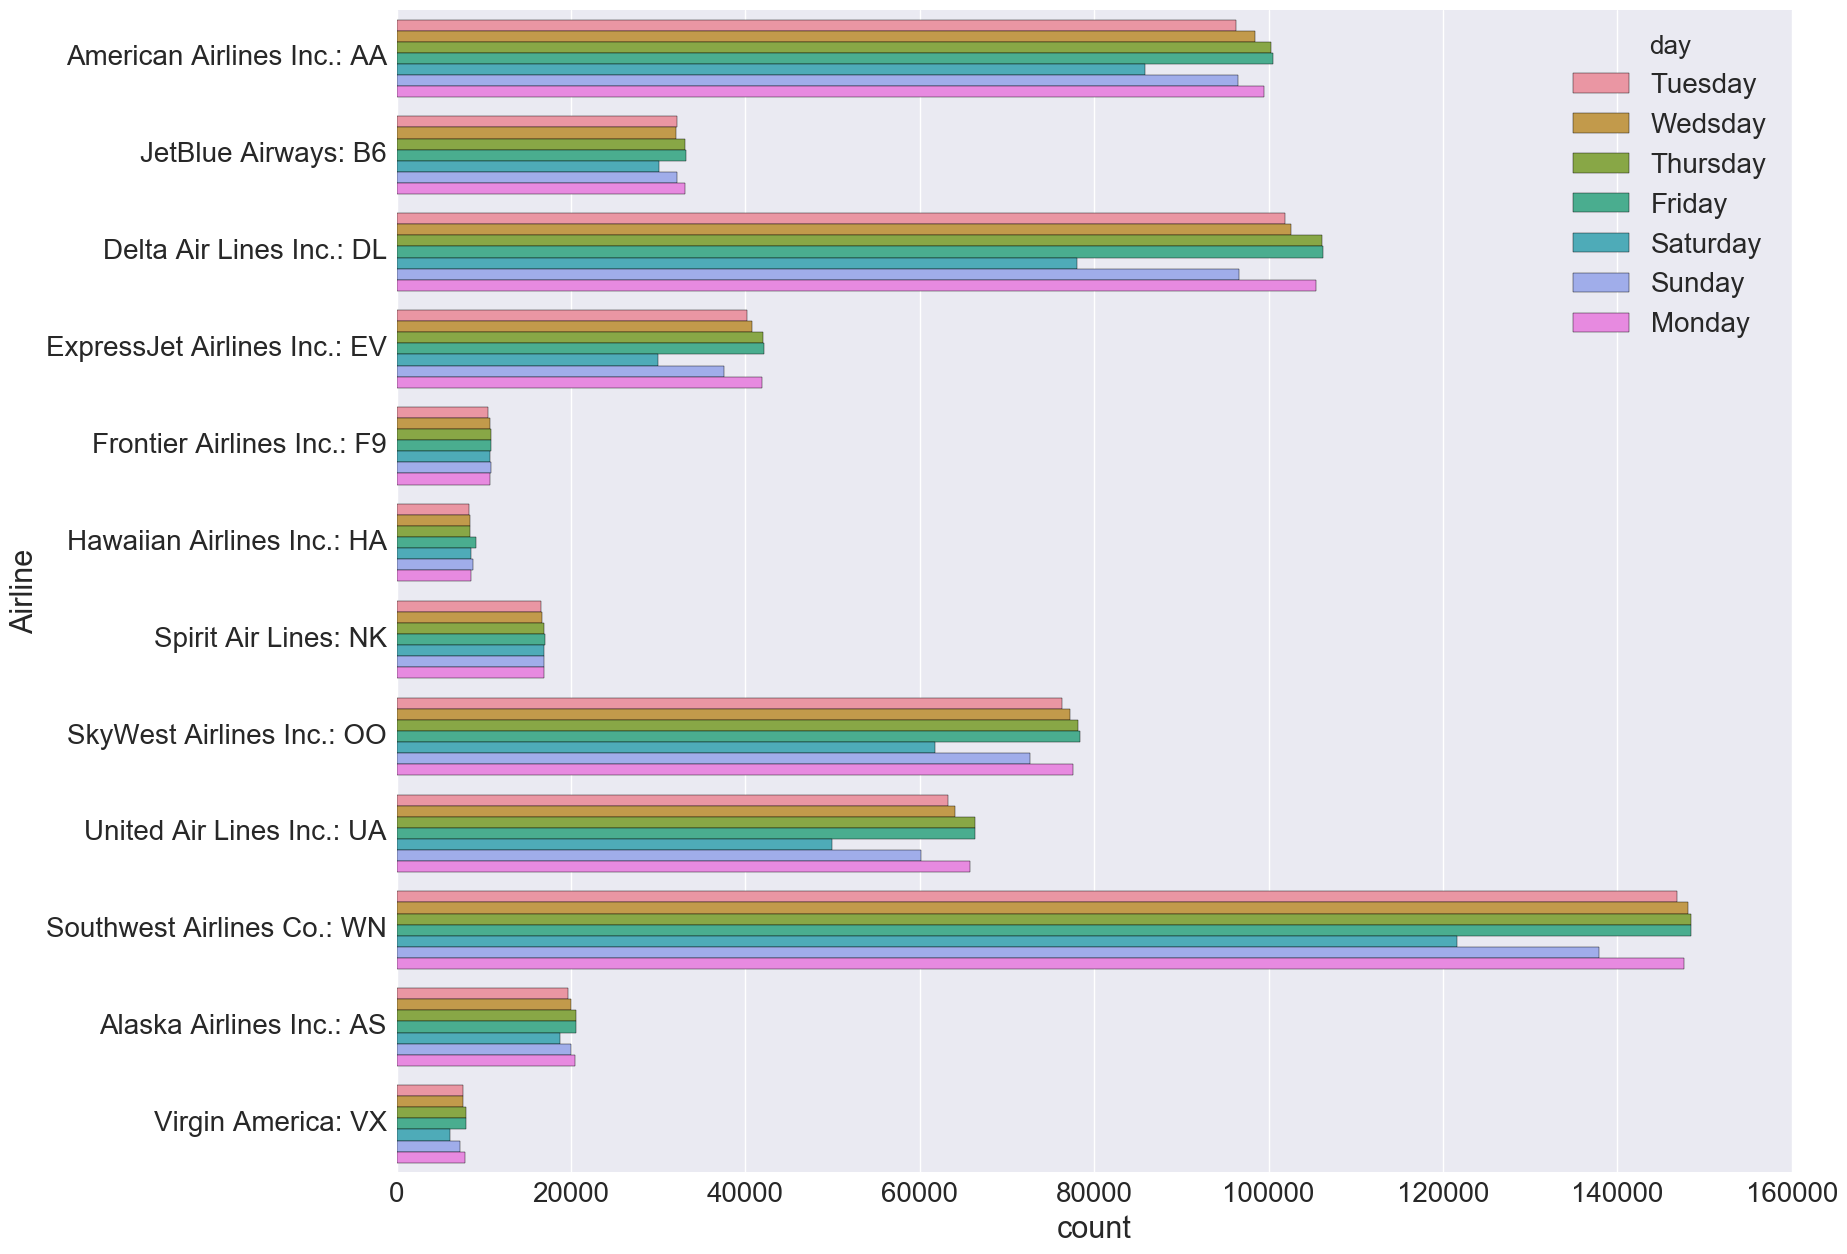

In [60]:
plt.figure(figsize=(18, 15))
ax = sns.countplot(y="Airline", hue='day', data=df)
plt.show()

In [61]:
col = ['FlightNum', 'Year', 'Month', 'Origin', 'Dest',
       'UniqueCarrier', 'ArrTime', 'DepTime', 'CRSArrTime', 'CRSDepTime',
       'CRSElapsedTime', 'ActualElapsedTime', 'ArrDelayMinutes',
       'DepDelayMinutes', 'OriginCityName', 'DestCityName','Airline','Status','day','OriginStateName','DestStateName']
data = df[col]

In [62]:
data

,FlightNum,Year,Month,Origin,Dest,UniqueCarrier,ArrTime,DepTime,CRSArrTime,CRSDepTime,...,ActualElapsedTime,ArrDelayMinutes,DepDelayMinutes,OriginCityName,DestCityName,Airline,Status,day,OriginStateName,DestStateName
0,494,2017,1,CLT,PHX,AA,1842.0,1616.0,1856,1619,...,266.0,0.0,0.0,"Charlotte, NC","Phoenix, AZ",American Airlines Inc.: AA,On Time,Tuesday,North Carolina,Arizona
1,494,2017,1,CLT,PHX,AA,1821.0,1614.0,1856,1619,...,247.0,0.0,0.0,"Charlotte, NC","Phoenix, AZ",American Airlines Inc.: AA,On Time,Wedsday,North Carolina,Arizona
2,494,2017,1,CLT,PHX,AA,1826.0,1611.0,1856,1619,...,255.0,0.0,0.0,"Charlotte, NC","Phoenix, AZ",American Airlines Inc.: AA,On Time,Thursday,North Carolina,Arizona
3,494,2017,1,CLT,PHX,AA,1929.0,1656.0,1856,1619,...,273.0,33.0,37.0,"Charlotte, NC","Phoenix, AZ",American Airlines Inc.: AA,Delayed,Friday,North Carolina,Arizona
4,494,2017,1,CLT,PHX,AA,1858.0,1632.0,1856,1619,...,266.0,2.0,13.0,"Charlotte, NC","Phoenix, AZ",American Airlines Inc.: AA,On Time,Saturday,North Carolina,Arizona
5,494,2017,1,CLT,PHX,AA,1921.0,1636.0,1856,1619,...,285.0,25.0,17.0,"Charlotte, NC","Phoenix, AZ",American Airlines Inc.: AA,Delayed,Sunday,North Carolina,Arizona
6,494,2017,1,CLT,PHX,AA,1907.0,1616.0,1856,1619,...,291.0,11.0,0.0,"Charlotte, NC","Phoenix, AZ",American Airlines Inc.: AA,On Time,Monday,North Carolina,Arizona
7,494,2017,1,CLT,PHX,AA,1904.0,1619.0,1856,1619,...,285.0,8.0,0.0,"Charlotte, NC","Phoenix, AZ",American Airlines Inc.: AA,On Time,Tuesday,North Carolina,Arizona
8,494,2017,1,CLT,PHX,AA,1906.0,1616.0,1856,1619,...,290.0,10.0,0.0,"Charlotte, NC","Phoenix, AZ",American Airlines Inc.: AA,On Time,Wedsday,North Carolina,Arizona
9,494,2017,1,CLT,PHX,AA,1902.0,1618.0,1856,1619,...,284.0,6.0,0.0,"Charlotte, NC","Phoenix, AZ",American Airlines Inc.: AA,On Time,Thursday,North Carolina,Arizona


In [63]:
def describeColumn(data):
    for col in data.columns:
        print("")
        print("DESCRIBING "+ col +":")
        print(data[col].describe())
describeColumn(data)


DESCRIBING FlightNum:
count    4.276457e+06
mean     2.115101e+03
std      1.715963e+03
min      1.000000e+00
25%      7.260000e+02
50%      1.665000e+03
75%      3.026000e+03
max      8.402000e+03
Name: FlightNum, dtype: float64

DESCRIBING Year:
count    4276457.0
mean        2017.0
std            0.0
min         2017.0
25%         2017.0
50%         2017.0
75%         2017.0
max         2017.0
Name: Year, dtype: float64

DESCRIBING Month:
count    4.276457e+06
mean     5.093892e+00
std      2.547088e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      7.000000e+00
max      9.000000e+00
Name: Month, dtype: float64

DESCRIBING Origin:
count     4276457
unique        315
top           ATL
freq       278273
Name: Origin, dtype: object

DESCRIBING Dest:
count     4276457
unique        314
top           ATL
freq       278211
Name: Dest, dtype: object

DESCRIBING UniqueCarrier:
count     4276457
unique         12
top            WN
freq       999114
Name: UniqueCa

In [64]:
Time = df[['DepTime','CRSDepTime','DepDelayMinutes','DepDelay']]
Time['hour'] = df['CRSDepTime'].apply(lambda x: str(x)[:-2])

In [66]:
Time.replace('', 0)
Time.hour.unique()

array(['16', '13', '19', '11', '9', '6', '10', '15', '7', '22', '12', '18',
       '20', '5', '14', '8', '23', '17', '21', '', '1', '3', '2', '4'], dtype=object)

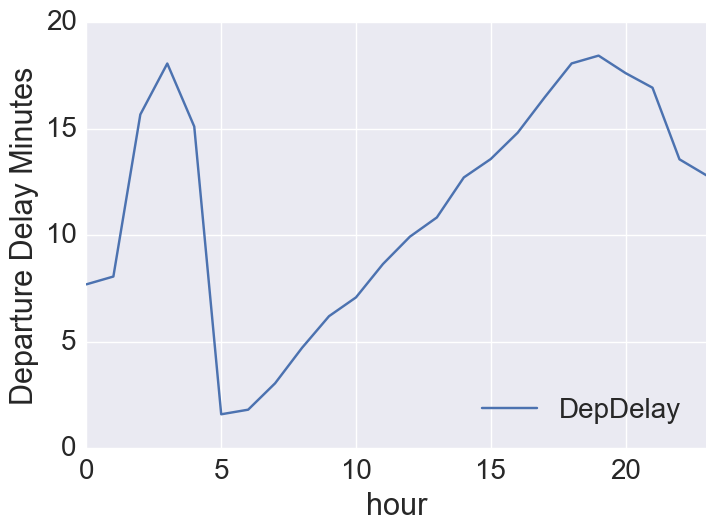

In [67]:
h = Time[['DepDelay','hour']].groupby('hour').mean().reset_index()
h = h.replace('', 0)
h['hour'] = h['hour'].astype(int)
h = h.sort_values(by='hour')
h.plot(x='hour',y='DepDelay')
plt.ylabel('Departure Delay Minutes')
plt.show()

In [68]:
s = df.groupby("OriginCityName").agg({ "Origin": pd.Series.nunique})

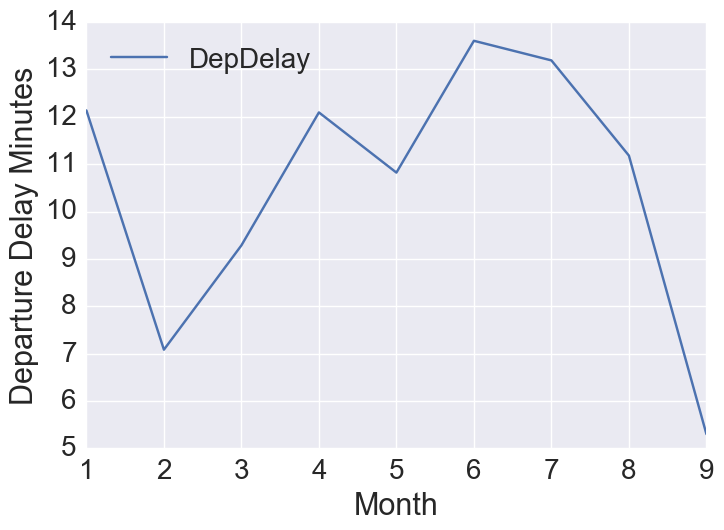

In [69]:
mm = df[['Month','DepDelay']].groupby('Month').mean().reset_index()
mm = mm.replace('', 0)
mm.plot(x='Month',y='DepDelay')
plt.ylabel('Departure Delay Minutes')
plt.show()

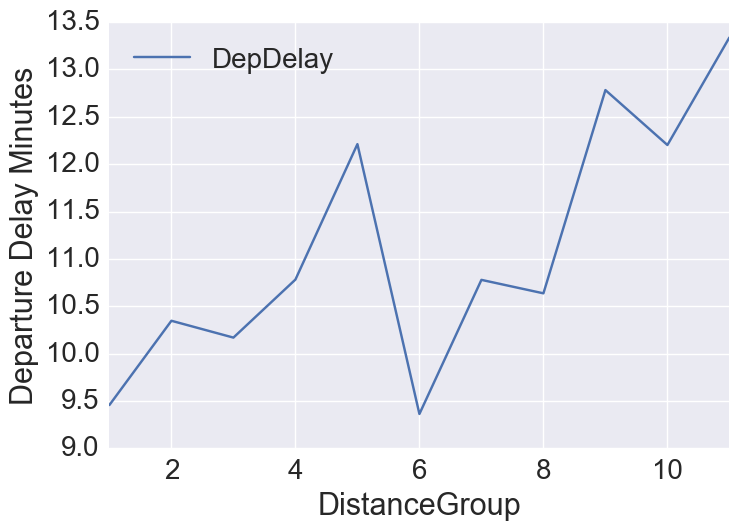

In [70]:
dis = df[['DistanceGroup','DepDelay']].groupby('DistanceGroup').mean().reset_index()
dis = dis.replace('', 0)
dis.plot(x='DistanceGroup',y='DepDelay')
plt.ylabel('Departure Delay Minutes')
plt.show()

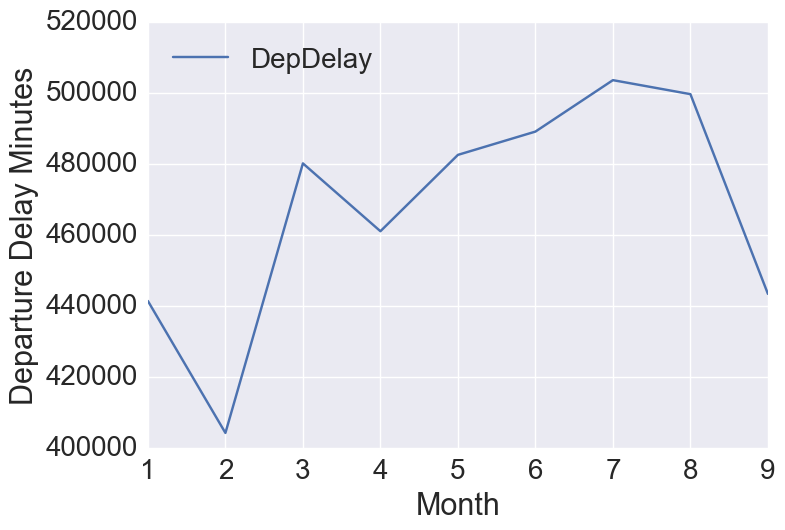

In [71]:
cc = df.groupby('Month').count().reset_index()
cc.plot(x='Month',y='DepDelay')
plt.ylabel('Departure Delay Minutes')
plt.show()

In [72]:
df['carrier'] = df['Carrier'].apply(lambda x: carrier_dict[x][0])

In [73]:
s = df.carrier.value_counts()
s.index.values

array(['Southwest Airlines Co.', 'Delta Air Lines Inc.',
       'American Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'ExpressJet Airlines Inc.',
       'JetBlue Airways', 'Alaska Airlines Inc.', 'Spirit Air Lines',
       'Frontier Airlines Inc.', 'Hawaiian Airlines Inc.', 'Virgin America'], dtype=object)

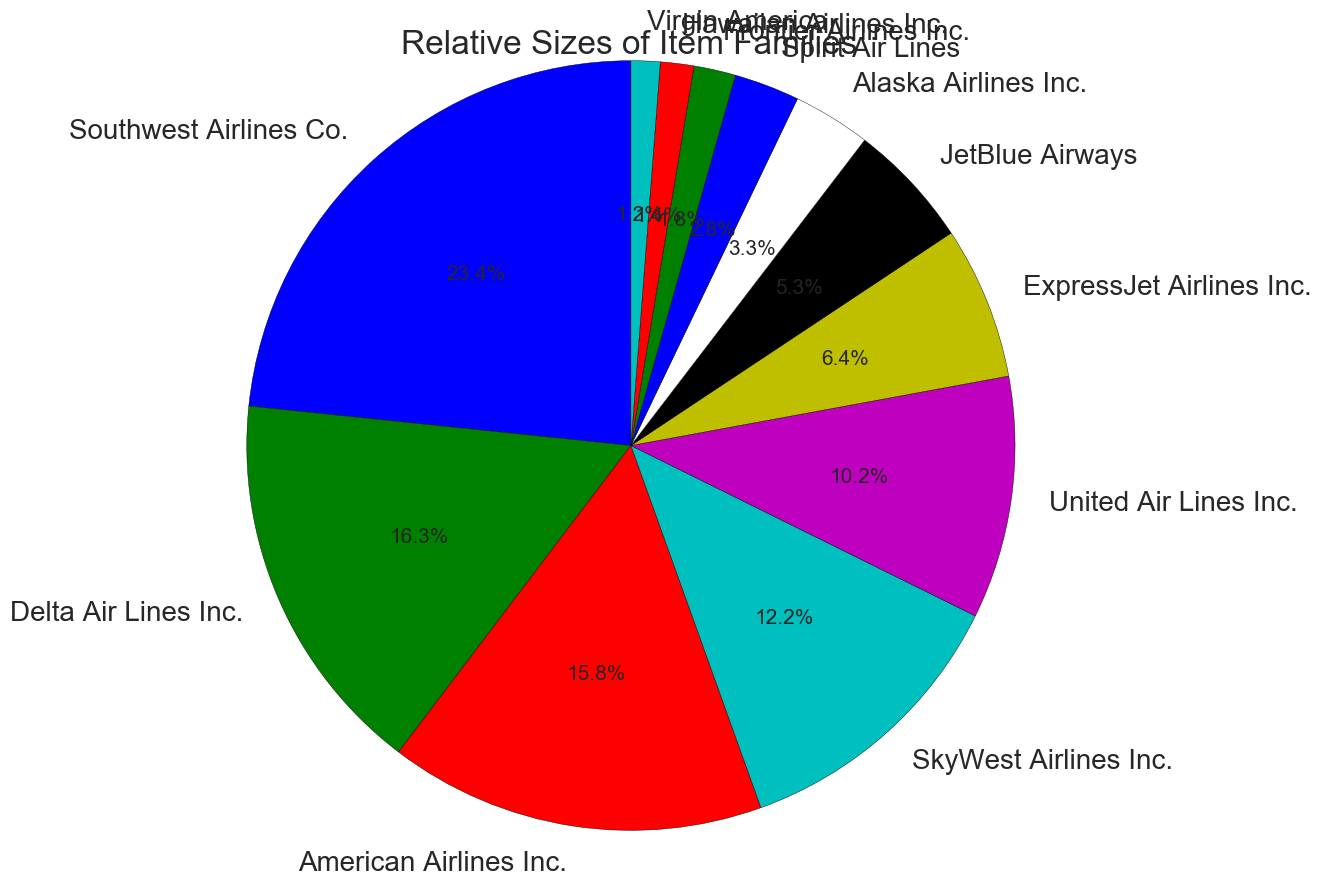

In [74]:
plt.figure(figsize=(10,10))
matplotlib.rcParams['font.size'] = 15.0
labels = s.index.values
plt.pie(s, labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Relative Sizes of Item Families')
plt.axis('equal') 
plt.show()

In [75]:
#df.Status#df.Month, df.day

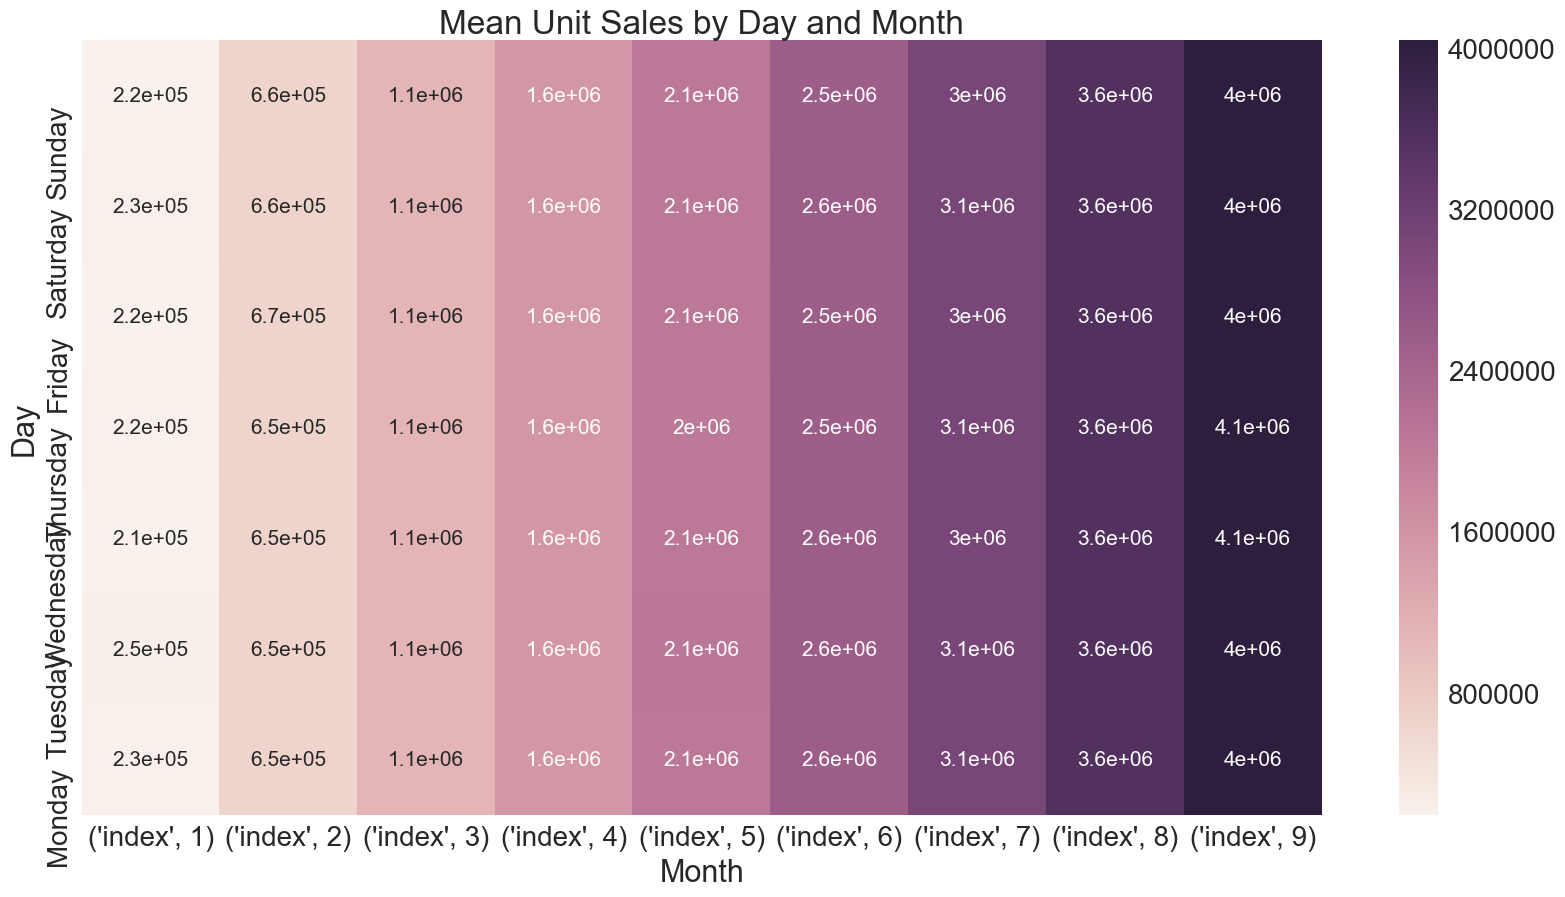

In [76]:
#time = unitsales[['day','month','unit_sales']]
time = pd.pivot_table(df, values=['index'], index=['day'], columns=['Month'], aggfunc=np.mean)
time = pd.DataFrame(time.to_records())
#time.columns = [hdr.replace("('Month', ","").replace(")", "") for hdr in time.columns]
time.drop('day', axis=1, inplace=True)


plt.close('all')
plt.figure(figsize=(20,10))
sns.heatmap(time, annot=True)
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.yticks(time.index.values, labels)
plt.ylabel('Day')
plt.xlabel('Month')
plt.title('Mean Unit Sales by Day and Month')
plt.show()
